# Linear Regression Analysis of Concrete Compressive Strength

## By Ruben Olmos


## Abstract

Using the dataset concrete from the UCIrvine machine learning reposisitory, we take a look at the impact that certain factors have on the compressive strength of concrete. Using the dataset we will be studying the impacts that certain attributes and factors may have on the concrete compressive strength in combination and in relation to one another. Our initial set of potential predictors will be the the set consisting of 8 quantitative predictors, the predictors are the following : cement(measuring the amount of cement that was used in the mixture),Blast Furnace Slag(measureing the amount of blast furnace used in the mixture),fly ash(measuring the amount of fly ash that was used in the mixture),water(measuring the amount of water used in the mixture),superplasticizer(measuring the amount of superplasticizer used in the mixture), coarse agregate(measuring the amount of coarse aggregate used in the mixture),fine aggregate(measuring the amount of fine aggregate used in the mixture), age(measuring the age of the mixture in days ).

## Questions of interest

1. Is the compressive strength of the concrete impacted by the amount of cement, the amount of blast furnace slag,the amount of fly ash, the amount of water, the amoung of superplasticizer, the amount of coarse aggregate, the amount of fine aggregate, and the age of the mixture? Which of the factors are the most impactful on compressive strength of the concrete?

2. What is the expected, or average compressive strength of the concrete when blast furnace component is equal to the very small value of 1?

3. What is the predicted compressive strength of a concrete mixture when the amount of fly ash component is 100 kg in a m3 mixture and the rest of the predictors are averaged?

## Regression Method

To answer the first question with linear regression, we processed the data in its raw form since there were no problems in the dataset itself. We use the scatterplots and correlation matrices and use the variance infaltion factors to determine the state of multicolinearity and whether it is a problem or not. We then proceed to check that LINE conditions are met in the proposed model with predictors that remain after adjusting for VIF. We then use various technics to find the final model that best aids us in answer questions about regression.
We will answer the above questions by:

1.Constructing a regression model that meets all LINE conditions and then use model selection criteria to determine the best fitting model

2.Constructing a 95% conidence interval using the specified predictor value, and assigning averages to the rest of the predictors

3.Constructing a 95 prediction interval for a new response value given the predictor value specified. The unspecified predictor values will take on their respective averages.

## Regression Analysis 

We let the variables x1,x2,x3,x4,x5,x6,x7,x8 be the the predictors for the response variable y. In this particular instance we have that the predictors are all quantitative and will approach the analysis in that way.
The response as stated will be concrete compress. We formulate a 8 predictor model with the following predictors 

x1=Cement -- a quantitative, measured in units of kg in a mixture

x2=Blast Furnace Slag -- a quantitative predictor, measured in units of kg in a mixture

x3=Fly Ash -- a quantitative predictor, measured in units of kg in a mixture

x4=Water -- q quantitative predictor, measured in units of kg in a m3 mixture

x5=Superplasticizer --a quantitative predictor , measured in units of kg in a mixture

x6=Coarse Aggregate --a quantitative predictor, measured in units of kg in a mixture

x7=Fine Aggregate -- a quantitative predictor , measured in units of kg in a mixture

x8=Age -- a quantitative predictor-- measured in days

y=Concrete compressive strength-- a quantitative factor, measured in MPAS

letting these be our predictors we begin with the model $y=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+\beta_{3}X_{3}+\beta_{4}X_{4}+\beta_{5}X_{5}+\beta_{6}X_{6}+\beta_{7}X_{7}+\beta_{8}X_{8}$

## Preperation of Data

Our data consists of 1030 entries for each row, in many of the rows there are numerous zero entries, this is fine however when attempting to run a powertransformation we add one to all entries in order to be able to check for transformations. Apart from this the data had no null or erroneous values that would inhibit analysis of the data.

## Loading the Packages

In [3]:
library(readr)
library(dplyr)
library(leaps)
library(MASS)
library(car)
library(plyr)
library(alr4)
library(readxl)

## Setting the variables 

In [5]:
concrete<-read_xls("/Users/rubenolmos/Desktop/Datasets/Concrete_Data.xls")
colnames(concrete)<-c("cement","blast furnace slag","fly ash","water","superplasticizer","coarse aggregate","fine aggregate","age","concrete strength")

cement<-concrete$cement
blast<-concrete$`blast furnace slag` #the blast furnance predictor
flyash<-concrete$`fly ash` #the fly ash component
water<-concrete$water #the water component 
superplast<-concrete$superplasticizer #the super plasticizer
coarseagg<-concrete$`coarse aggregate` #the coarse aggregator
fineagg<-concrete$`fine aggregate` #the fine aggregator
age<-concrete$age #age of cement 
strength<-concrete$`concrete strength` #response of the model, the strength of the concrete

We start with a look at the scatterplot as an  analysis of the impacts that predictors have on the model, examinging the marginal relationships. We hope to gain some visual indications of the realtionships between the predictors and the response. By doing so we hope to have some indication of where to focus our analysis and where to focus our efforts to properly model the multiple linear regression model. 

## Scatter Plot Matrix 

cement      blast furnace slag fly ash      water      
cement              1.00000000 -0.27519344        -0.397475440 -0.08154361
blast furnace slag -0.27519344  1.00000000        -0.323569468  0.10728594
fly ash            -0.39747544 -0.32356947         1.000000000 -0.25704400
water              -0.08154361  0.10728594        -0.257043997  1.00000000
superplasticizer    0.09277137  0.04337574         0.377339559 -0.65746444
coarse aggregate   -0.10935604 -0.28399823        -0.009976788 -0.18231167
fine aggregate     -0.22272017 -0.28159326         0.079076351 -0.45063498
age                 0.08194726 -0.04424580        -0.154370165  0.27760443
concrete strength   0.49783272  0.13482445        -0.105753348 -0.28961348
                   superplasticizer coarse aggregate fine aggregate
cement              0.09277137      -0.109356039     -0.22272017   
blast furnace slag  0.04337574      -0.283998230     -0.28159326   
fly ash             0.37733956      -0.009976788      0.07907635   
water              -0.65746444      -0.182311668     -0.45063498   
superplasticizer    1.00000000      -0.266302755      0.22250149   
coarse aggregate   -0.26630276       1.000000000     -0.17850575   
fine aggregate      0.22250149      -0.178505755      1.00000000   
age                -0.19271652      -0.003015507     -0.15609405   
concrete strength   0.36610230      -0.164927821     -0.16724896   
                   age          concrete strength
cement              0.081947264  0.4978327       
blast furnace slag -0.044245801  0.1348244       
fly ash            -0.154370165 -0.1057533       
water               0.277604429 -0.2896135       
superplasticizer   -0.192716518  0.3661023       
coarse aggregate   -0.003015507 -0.1649278       
fine aggregate     -0.156094049 -0.1672490       
age                 1.000000000  0.3288770       
concrete strength   0.328876976  1.0000000

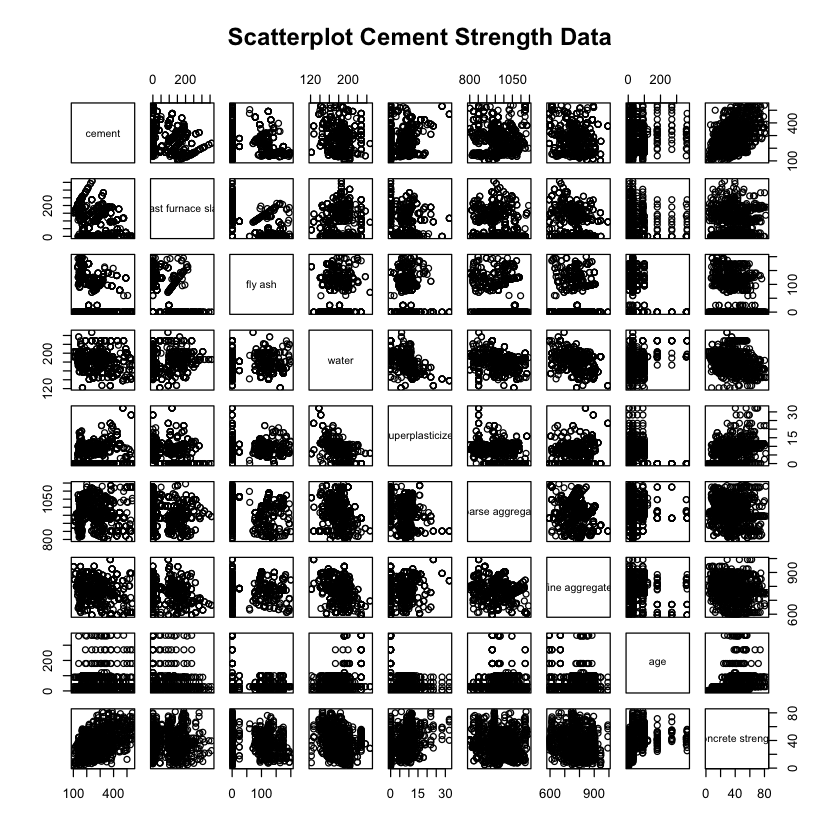

In [6]:
pairs(concrete, main = "Scatterplot Cement Strength Data")
cor(concrete)

We see the visual representation of the marginal relationships and observe that there does not seem to be much multicolinearity in the scatterplot. However, we see that there is some correlation between the variables looking at the correlation ,matrix, no correlation is very significant and therfore no correlation between the the predictors exist. However there is a possibility that there is multicolinearity given that values involving cement are large but not extremly large. We begin by looking at the plots of the model to gain further insight

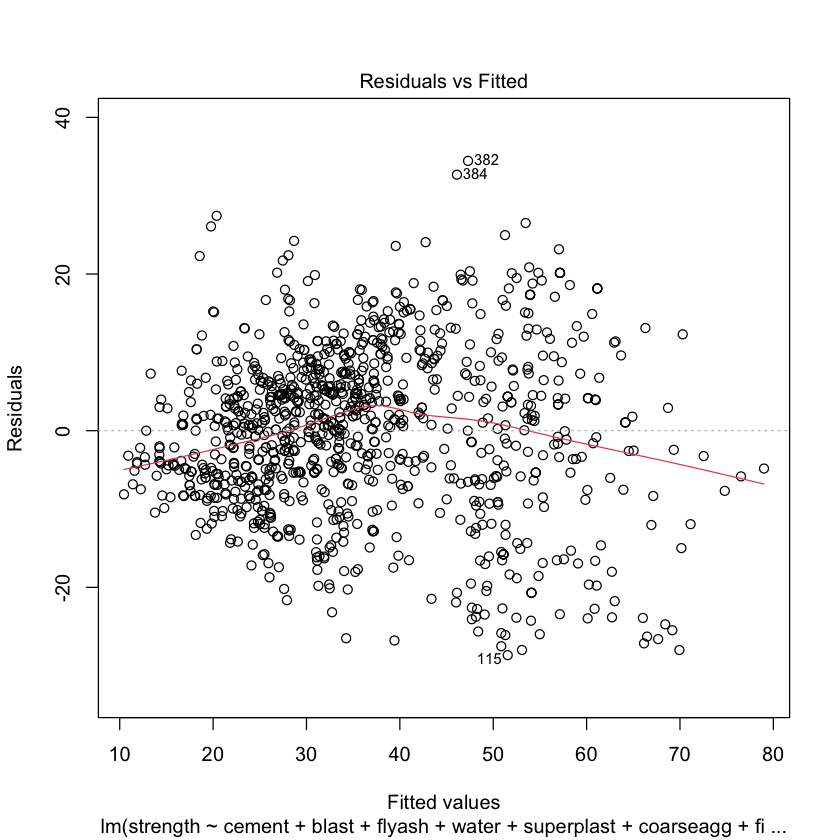

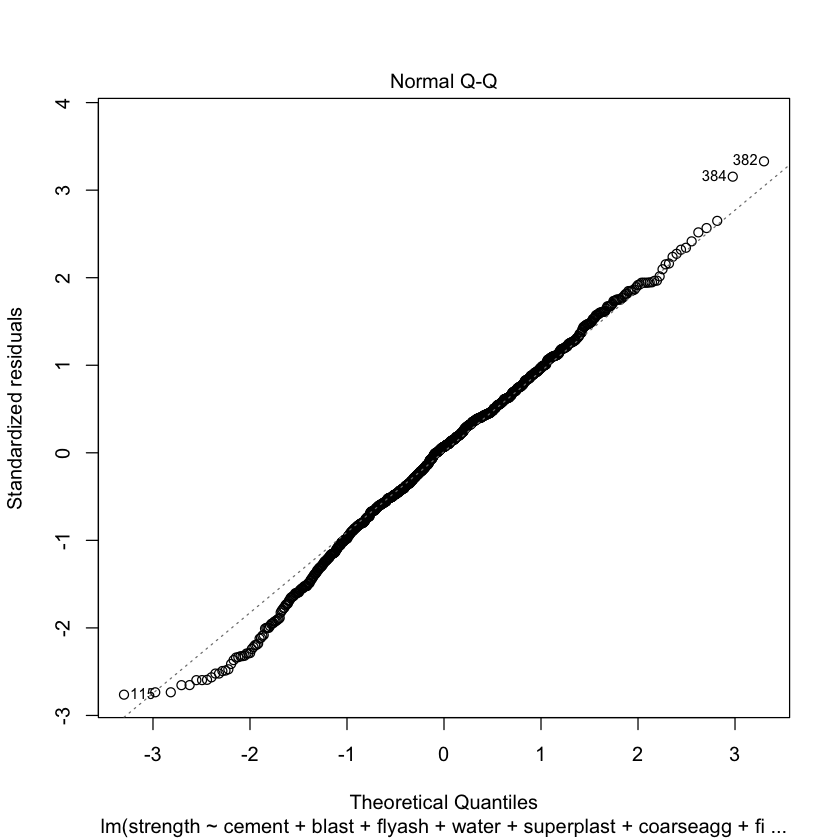

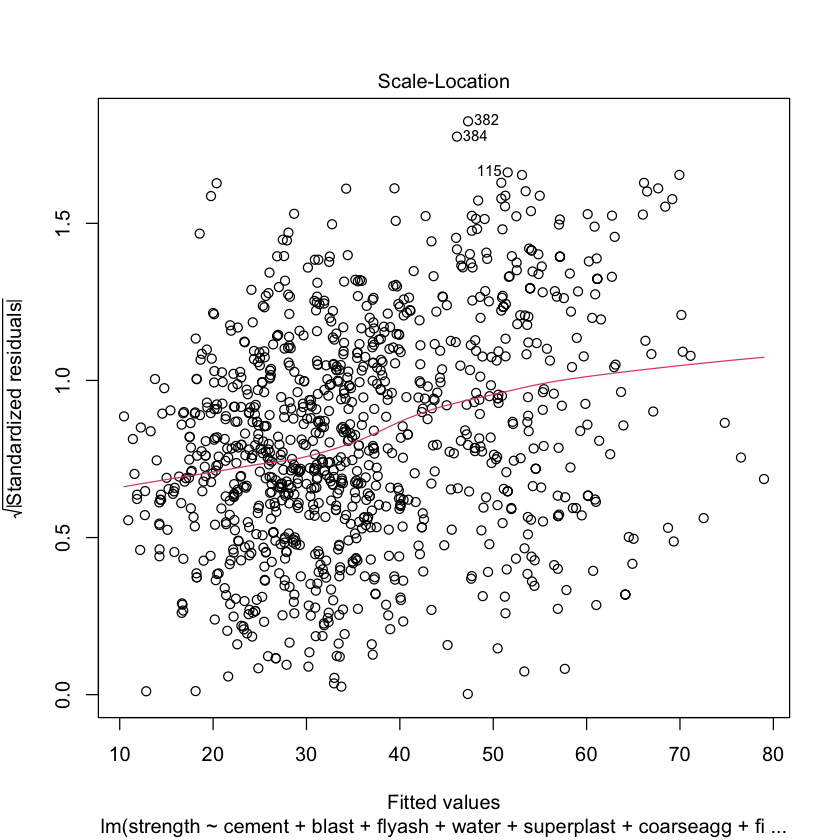

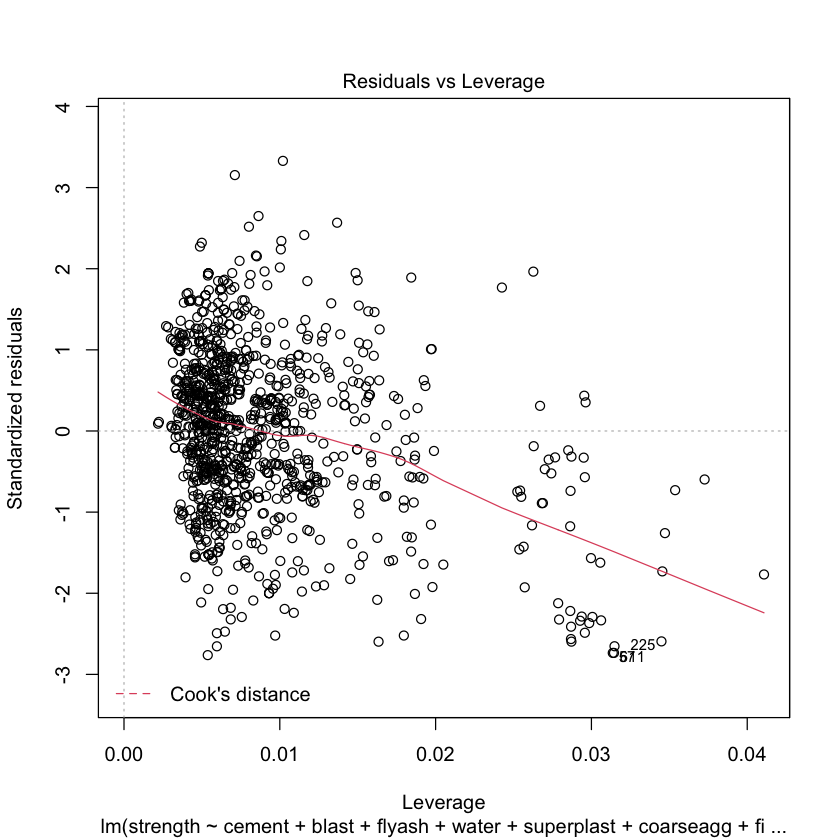

In [7]:
model1<-lm(strength~cement+blast+flyash+water+superplast+coarseagg+fineagg+age)
plot(model1)

We see that the residuals vs fitted plot shows that the model is well behaved although not ideal, there does seem to be indicators of outliers and leverage points in the model. We also see that that the QQ plot is not well behaved, this indicates that the residuals of the model are not normal, further the leverage vs residuals plot are also not well behaved. Furthermore, the plot of the standardized residuals vs fitted values is also not behaved. Before moving forward we address if some of these behaviors can be attributed to improper charcteristics in the VIF values. If improper values are found this will indicate that we should not include predictors. We then check the VIF(variance influence factors), in general we want values less than 5 in order to have a proper linear regression model. 

In [8]:
vif(model1)

cement      blast     flyash      water superplast  coarseagg    fineagg 
  7.488657   7.276529   6.171455   7.004663   2.965297   5.076044   7.005346 
       age 
  1.118357

We see high amounts of vif in the model ideally we want to have our variation influence factors below 5.The high vif values indicates high multicollinearity in the model. We observe that the highest vif in the model is 7.488657 which corresponds to cementcomp, we remove it and update our model.

In [9]:
model2<-lm(strength~blast+flyash+water+superplast+coarseagg+fineagg+age)
vif(model2)

blast     flyash      water superplast  coarseagg    fineagg        age 
  1.519534   1.398433   3.535570   2.965042   2.006979   1.847876   1.114136

We see that the variation influence factors in our model we updated value our now all below 5, this indicates that the model has now decreased the multicolinearity in the model.

We now check that the condiditons for a linear regression model are met. Firstly we begin by checking for linearity and a surface level check at the variance of the model. 

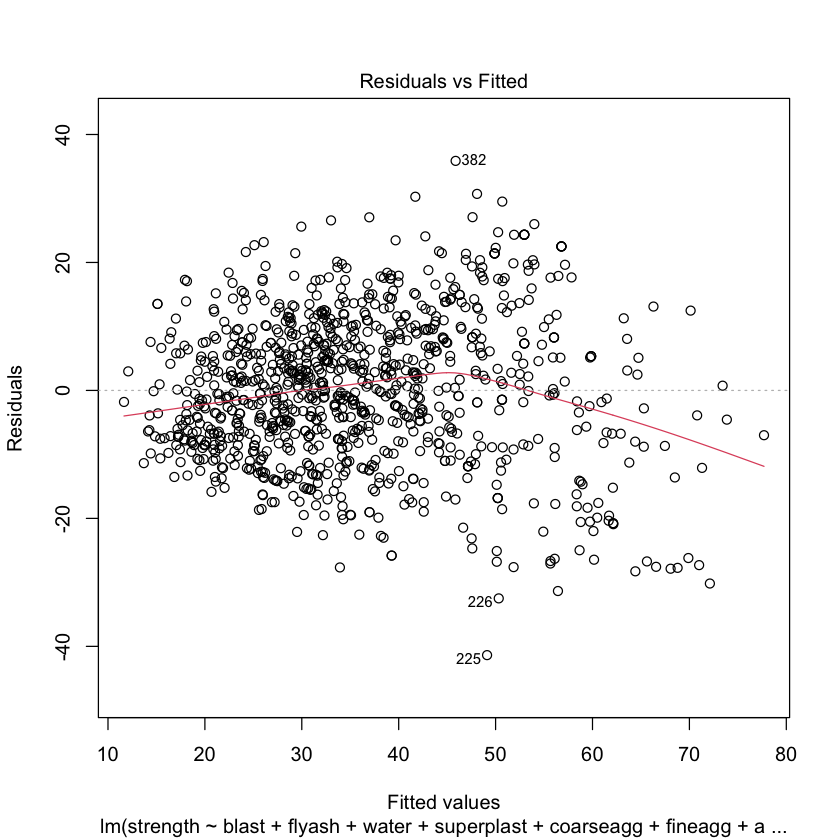

In [10]:
plot(model2,which=1)

We see that the residuals for the most part tend to fall around the zero residual line pretty evenly however there seems to be some clustering and shift in variances going from the points for lower fitted values to points for higher fitted values, with some possible outliers in the data. 

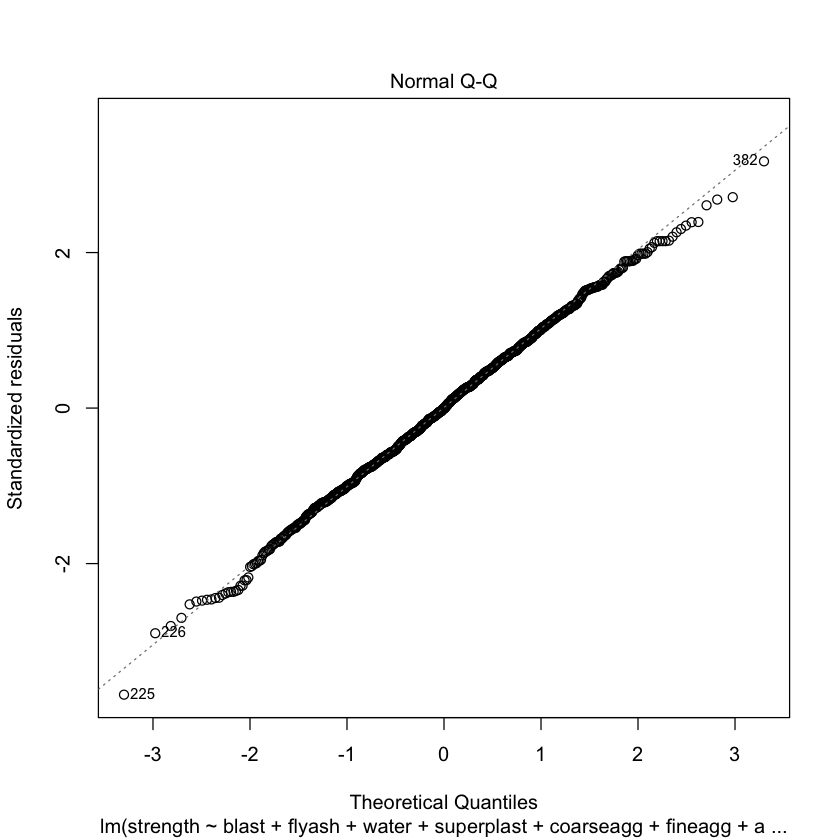

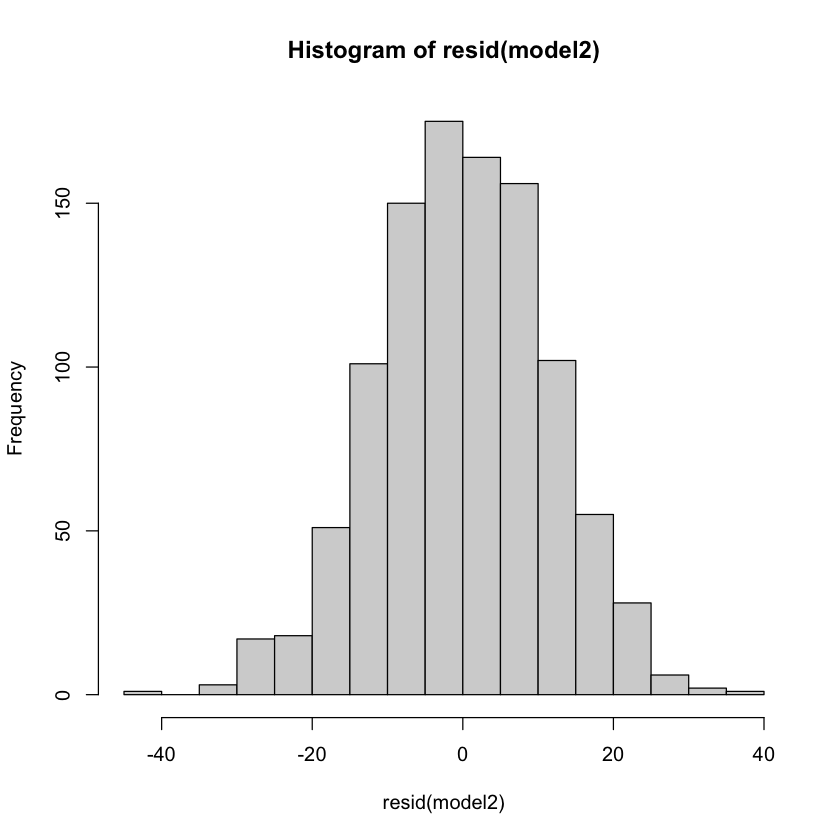

In [11]:
plot(model2,which=2)
hist(resid(model2))

The Q-Q plot indicates the model is very normal. We observe however that even in the model the observations that seemed to be outliers in the residuals v.s fitted plot seem to greatly fall away here. Further the plot of the histogram for the model seems to greatly show a normal distribution, this indicates that the assumption of normal distribution is satisfied.We can tranform the data and see if we get more appropriate results for the data specifically in the fitted v.s residual plots. We do this by transforming the response variable strength.


we now attempt to check if transformations for the predictors should occurr using the powertransform function, since our data contains zeros and since the function of powertransform requires non zero values we add 1 to all of our values, doing so will allow us to check for potential benificial transformations. It should be noted that we are only capable of doing this if and only if the residuals of our model are normal.

In [13]:
l<-resid(model2)
shapiro.test(l)


	Shapiro-Wilk normality test

data:  l
W = 0.99881, p-value = 0.7373


We note that running shapiro.test on the residuals of the model returns a very large p-value, this indicates that the model is very well normally distributed, this indicates that we may proceed to updating data values, in order to check for possible transformation of variables.

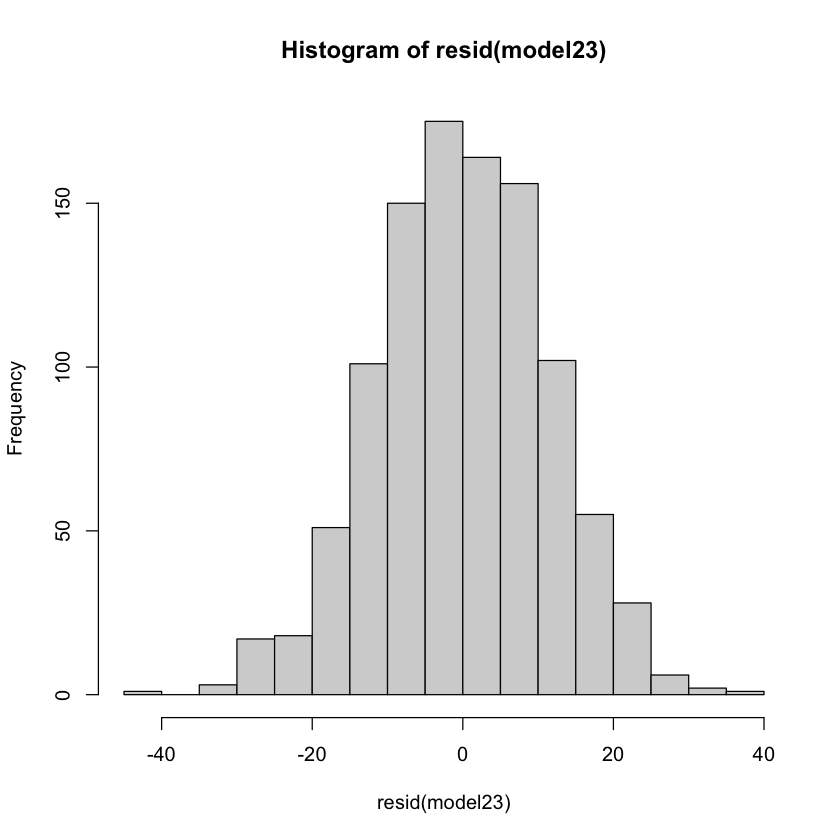

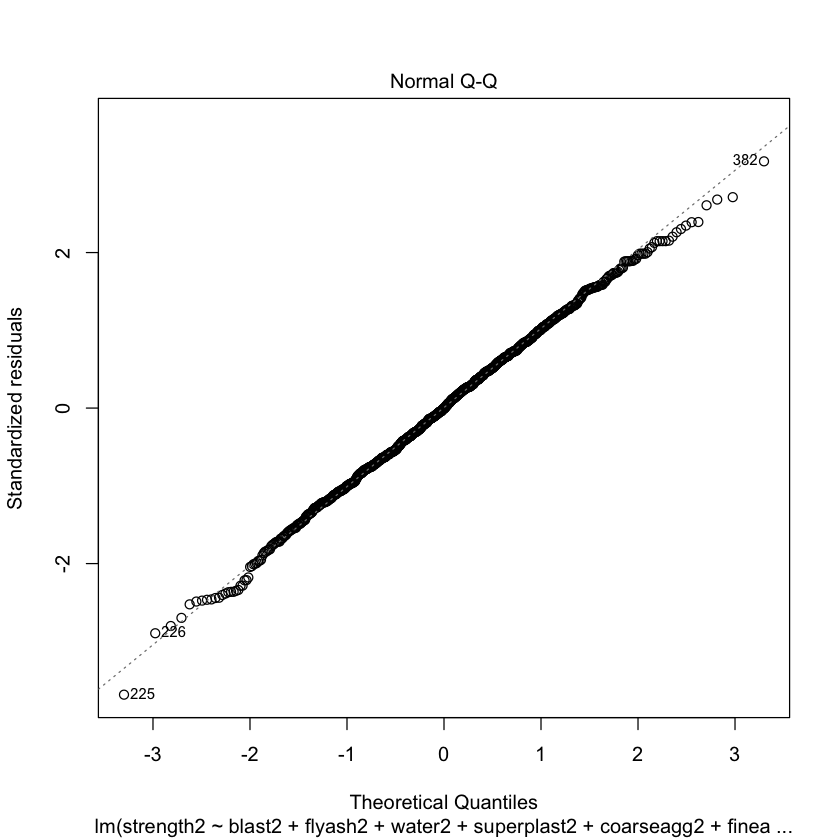

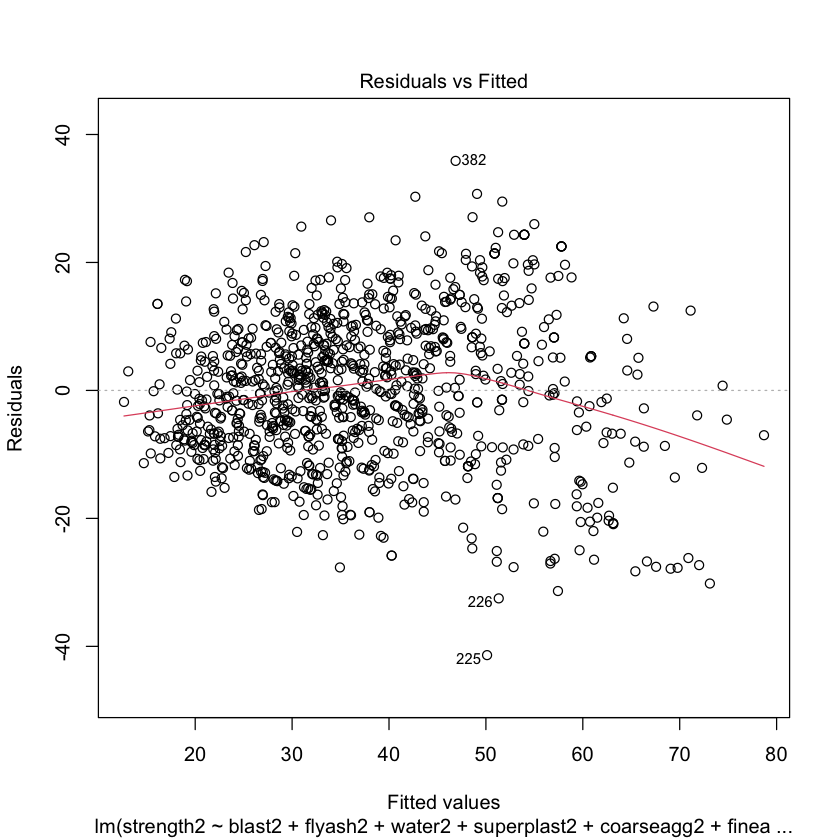

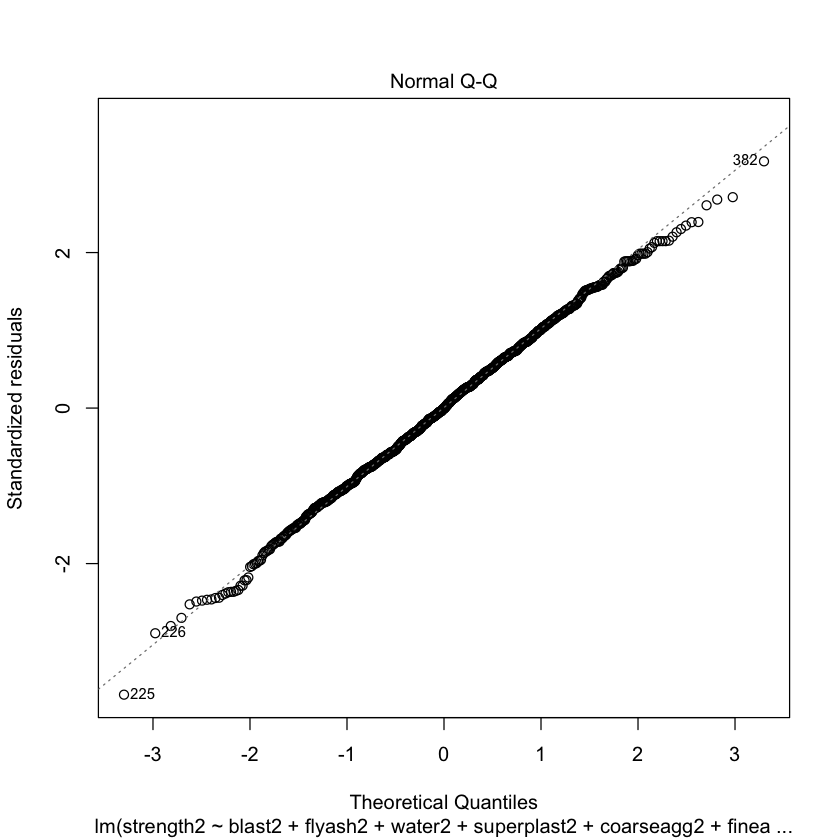

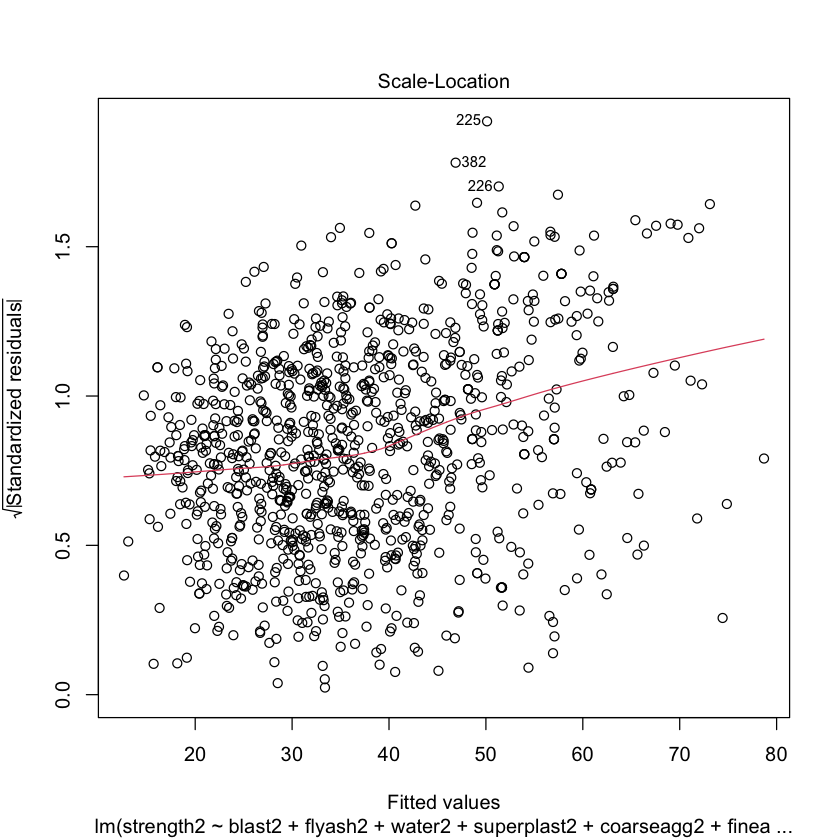


	Shapiro-Wilk normality test

data:  resid(model23)
W = 0.99881, p-value = 0.7373


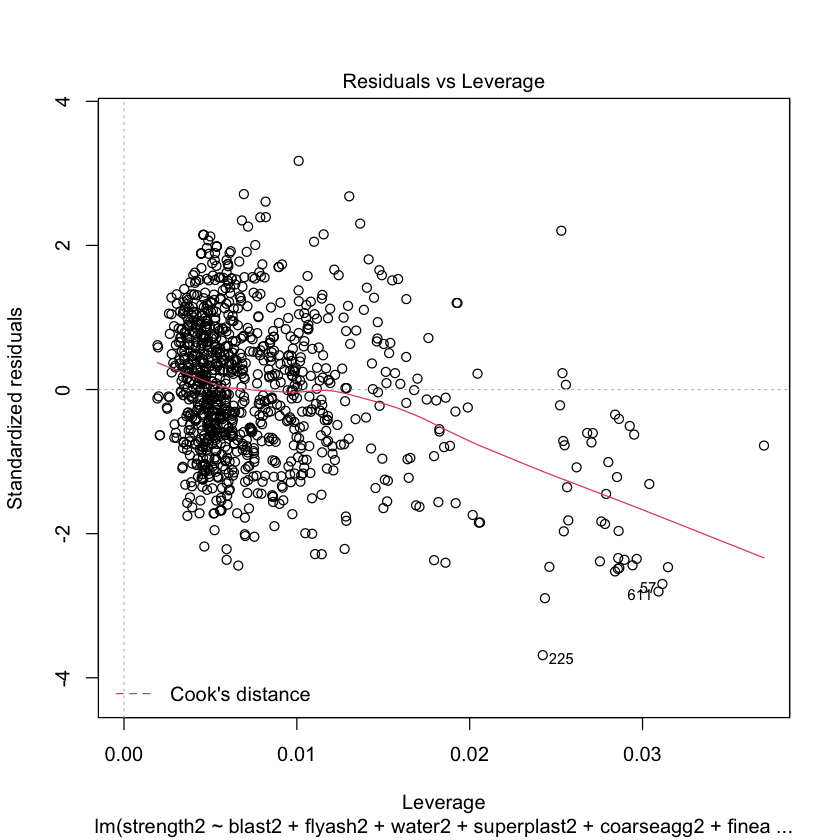

In [14]:
concrete2<-read_xls("/Users/rubenolmos/Desktop/Datasets/Concrete_Data.xls")
#modifying the dataset
concrete2<-concrete+1
colnames(concrete2)<-c("cement","blast furnace slag","fly ash","water","superplasticizer","coarse aggregate","fine aggregate","age","concrete strength")

cement2<-concrete2$cement
blast2<-concrete2$`blast furnace slag` #the blast furnance predictor
flyash2<-concrete2$`fly ash` #the fly ash component
water2<-concrete2$water #the water component 
superplast2<-concrete2$superplasticizer #the super plasticizer
coarseagg2<-concrete2$`coarse aggregate` #the coarse aggregator
fineagg2<-concrete2$`fine aggregate` #the fine aggregator
age2<-concrete2$age #age of cement 
strength2<-concrete2$`concrete strength` #response of the model, the strength of the concrete




model23<-lm(strength2~blast2+flyash2+water2+superplast2+coarseagg2+fineagg2+age2)
hist(resid(model23))

plot(model23,which=2)
plot(model23)
shapiro.test(resid(model23))
#using update nozero transformation to check for viable transformations of predictors

we see that the nonzero-data is heavily normal, however we test to see if we can see some improvement in the residuals vs fit plot by transforming the predictors.

In [17]:
pt<-powerTransform(cbind(blast2,flyash2,water2,superplast2,coarseagg2,fineagg2,age2)~1,concrete2)
summary(pt)

bcPower Transformations to Multinormality 
            Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
blast2         0.0284        0.00      -0.0112       0.0680
flyash2       -0.1406       -0.14      -0.1843      -0.0970
water2         1.2194        1.00       0.9079       1.5308
superplast2    0.2232        0.22       0.1596       0.2867
coarseagg2     1.5422        1.00       0.9161       2.1683
fineagg2       1.7940        2.00       1.3446       2.2433
age2           0.0101        0.00      -0.0389       0.0592

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                                       LRT df       pval
LR test, lambda = (0 0 0 0 0 0 0) 255.1965  7 < 2.22e-16

Likelihood ratio test that no transformations are needed
                                       LRT df       pval
LR test, lambda = (1 1 1 1 1 1 1) 6771.285  7 < 2.22e-16

We use the above output and transform the predictors. We transform the predictors blast furnance,age,coarseagg, and superplast according to a log transformation. We do not transform the predictors water and coarse aggregate. Further for fine agg we transform according to a square transformation. We update our model and test normality using a shapiro test

In [18]:
modeltran<-lm(strength2~log(blast2)+log(flyash2)+water2+log(superplast2)+coarseagg2+fineagg2+log(age2)+I(fineagg2^2))
shapiro.test(resid(modeltran))


	Shapiro-Wilk normality test

data:  resid(modeltran)
W = 0.99243, p-value = 4.048e-05


We see that the model has a shapiro test p value that indicates that the model is not normal, this might be indication that the model should not be transformed given that we had a satisfaction of normality before. We look at the characteristics of the model with transformed predictors before proceeding.

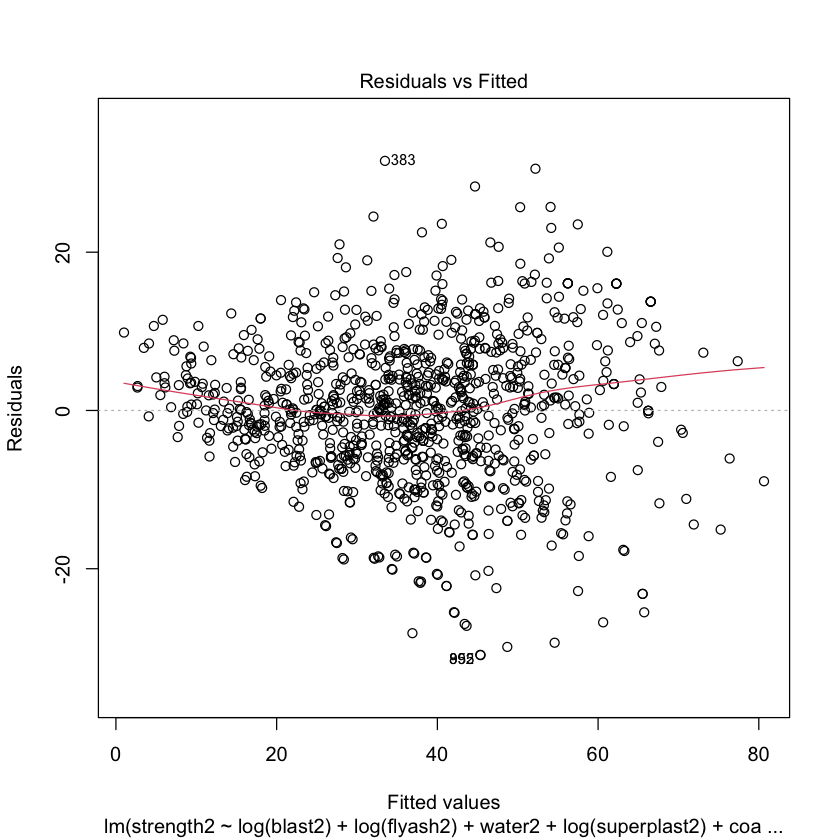

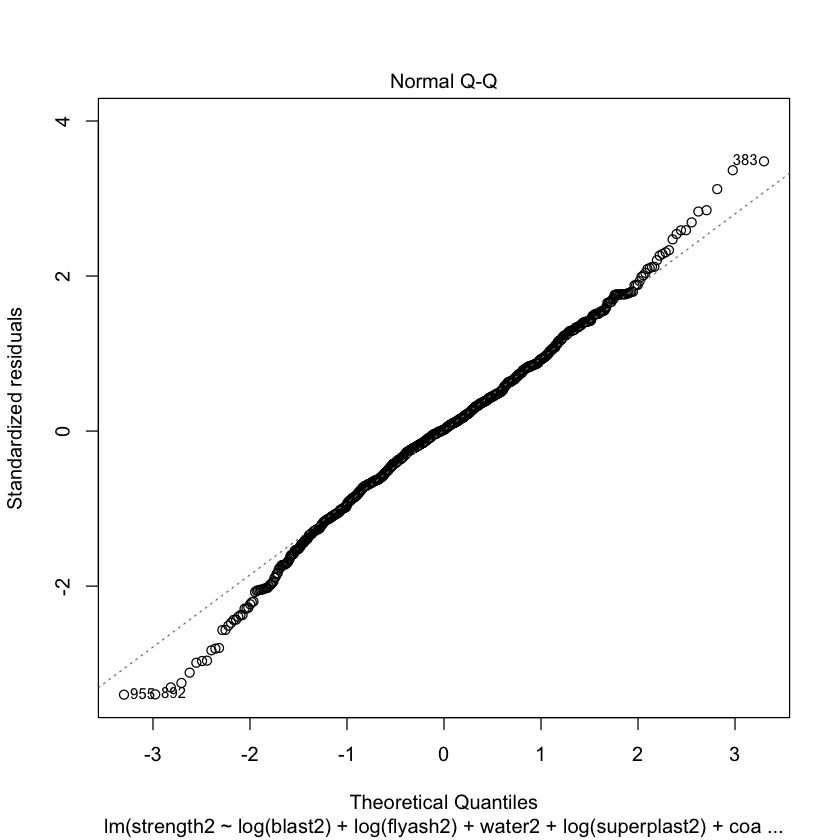

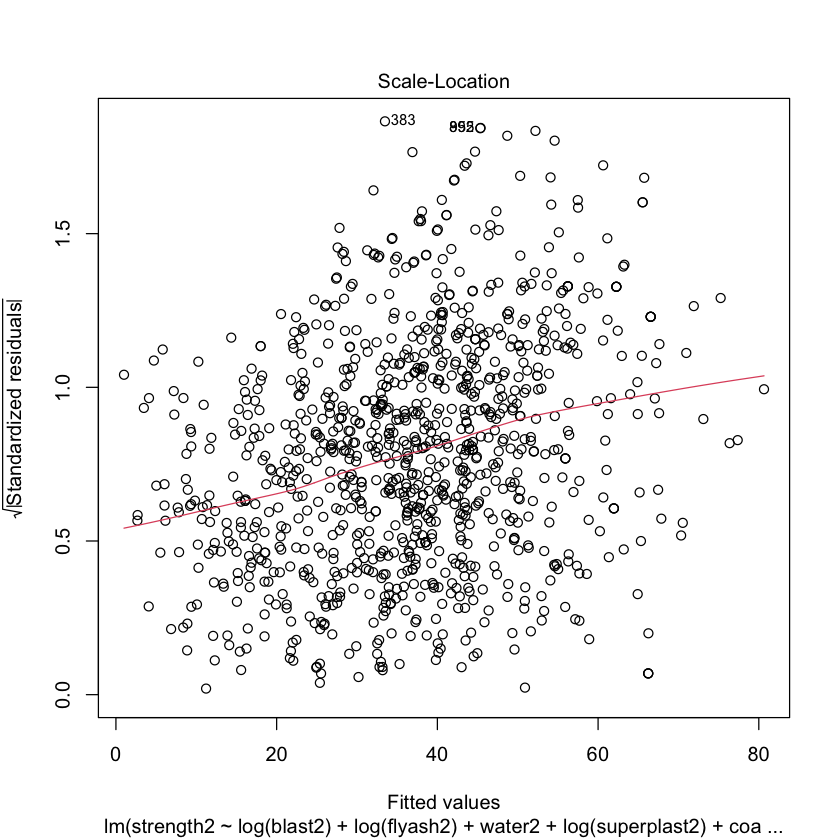

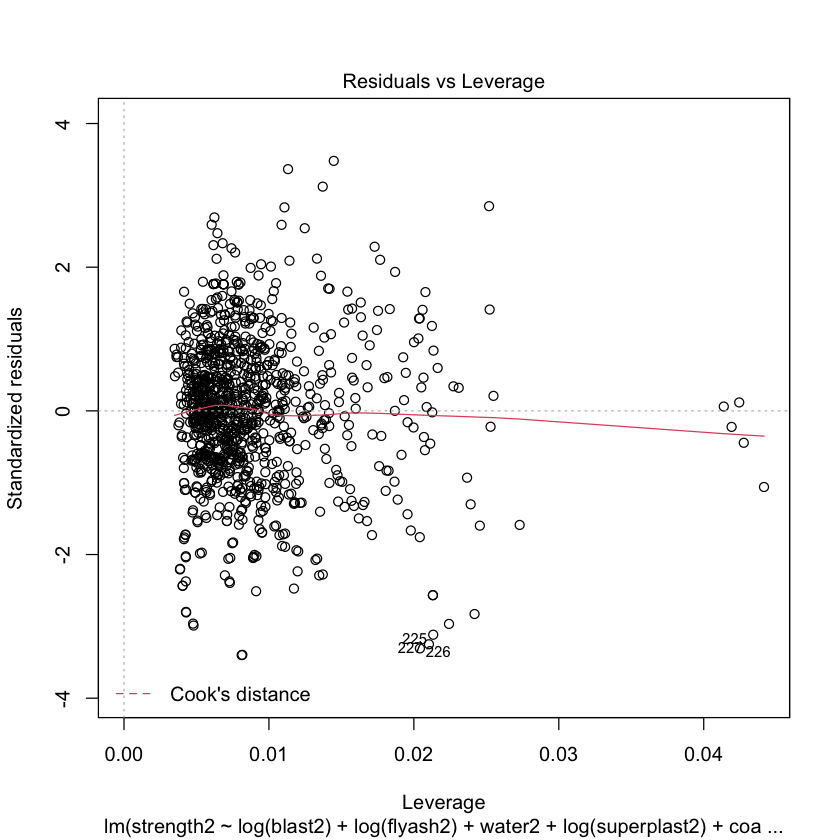

Res.Df RSS       Df Sum of Sq F        Pr(>F)      
1 1021    85099.71 NA        NA       NA           NA
2 1022   131961.43 -1 -46861.72 562.2325 2.298495e-99

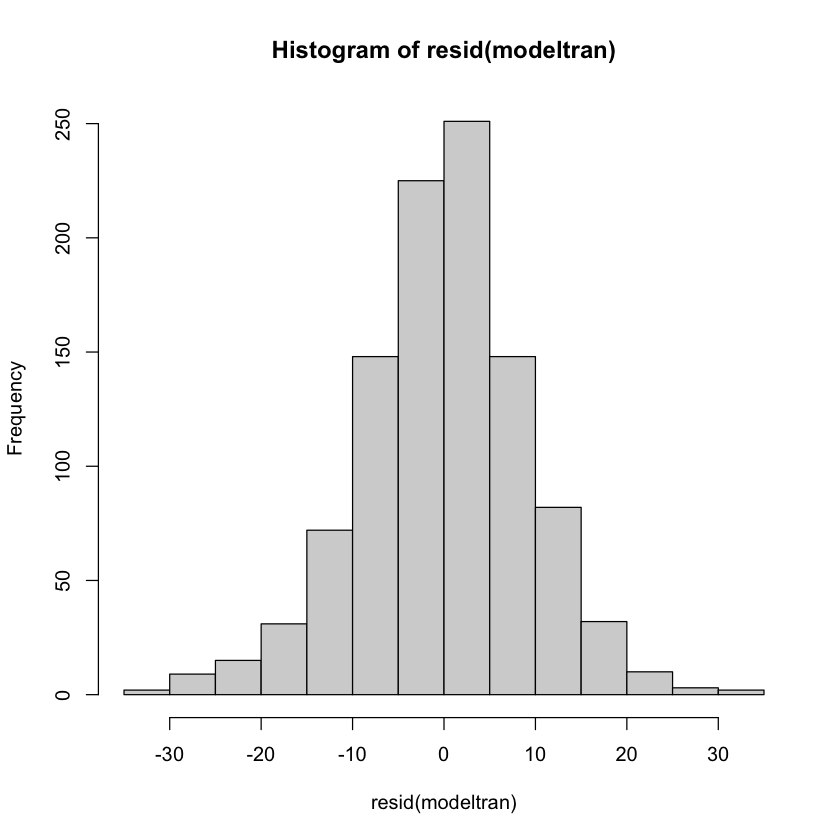

In [19]:
plot(modeltran)
hist(resid(modeltran))
anova(modeltran,model23)

We see that applying transformations to the predictor negatively impacts the model. At this point it seems that it might be best not to transform the predictors, however it is possible to see improvemnt after transsforming the response. We then transform the response before drawing a conclusion on the transformation of the model. We move on to finding the best suited transformation of the response using the box-cox method 

[1] 0.5454545

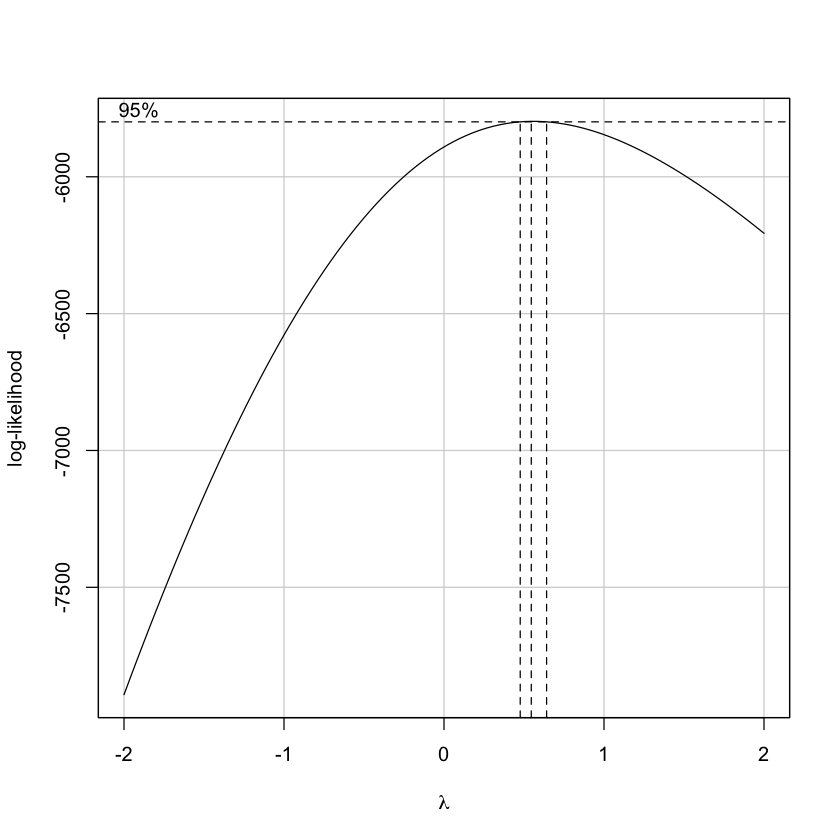

In [20]:
bcTransform2<-boxCox(modeltran)
lambdab<-bcTransform2$x[which.max(bcTransform2$y)] #calculating optimal lambda
lambdab
strength.bc2<-sqrt(strength2)
modeltranb<-lm(strength.bc2~log(blast2)+log(flyash2)+water2+log(superplast2)+coarseagg2+fineagg2+log(age2)+I(fineagg2^2))

we see that the optimal lambda corresponds to a value of around .5, this implies that the best transformation of the response is to take the square root of the response. We transform in accordance to this lambda and look at the characteristics with the new model

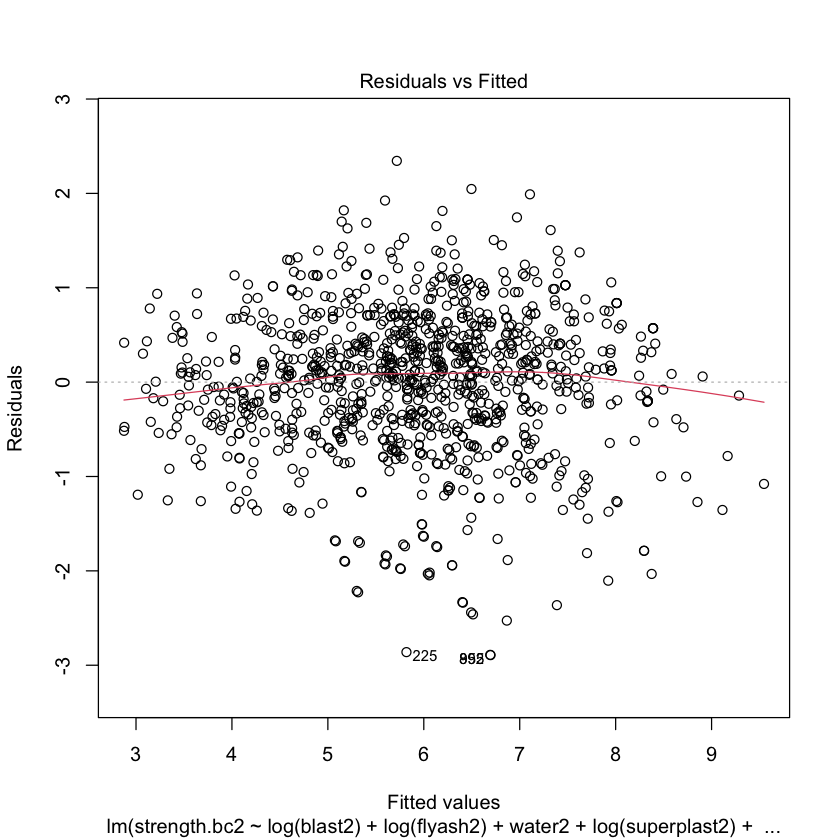

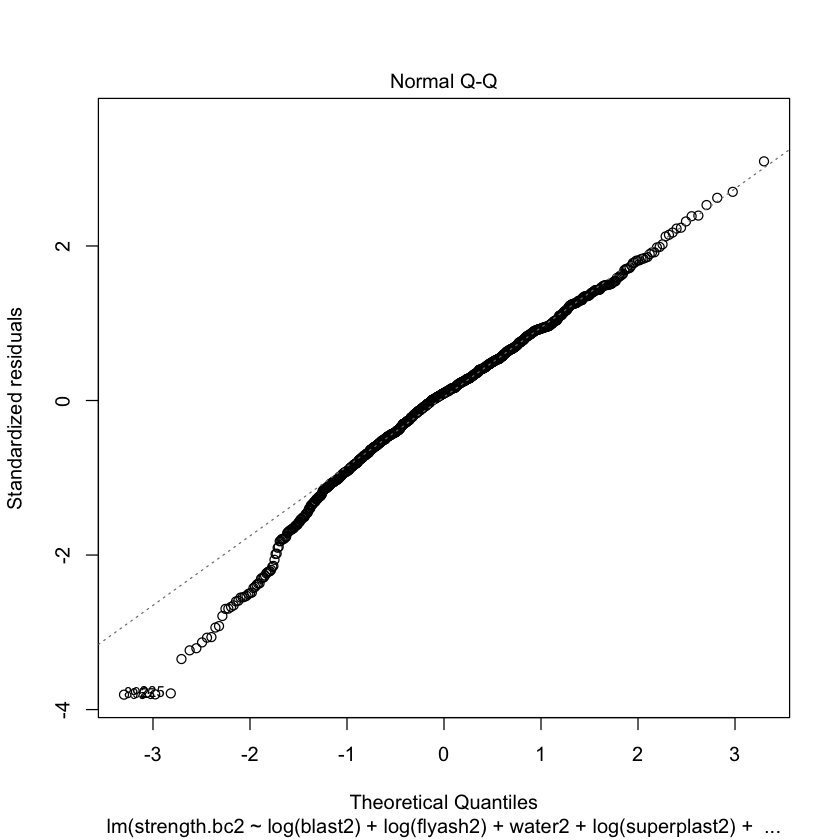

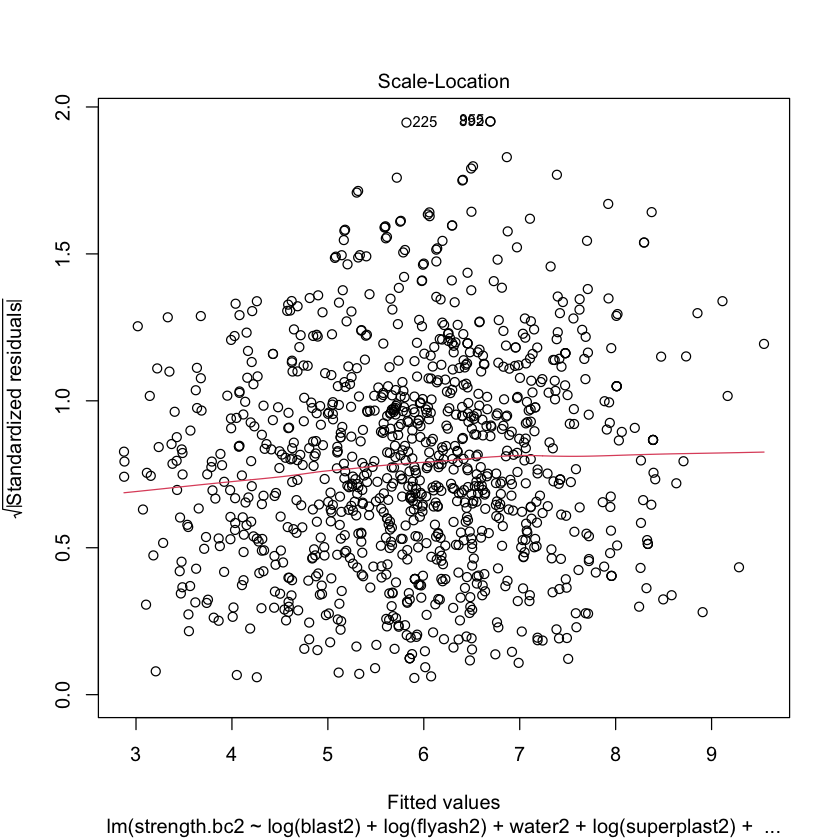

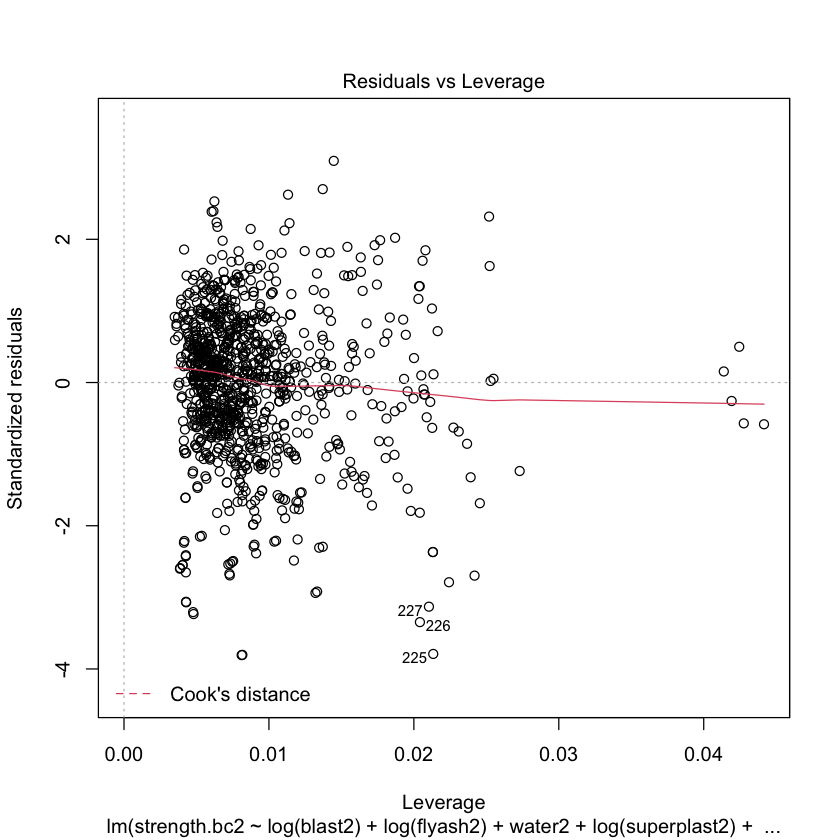

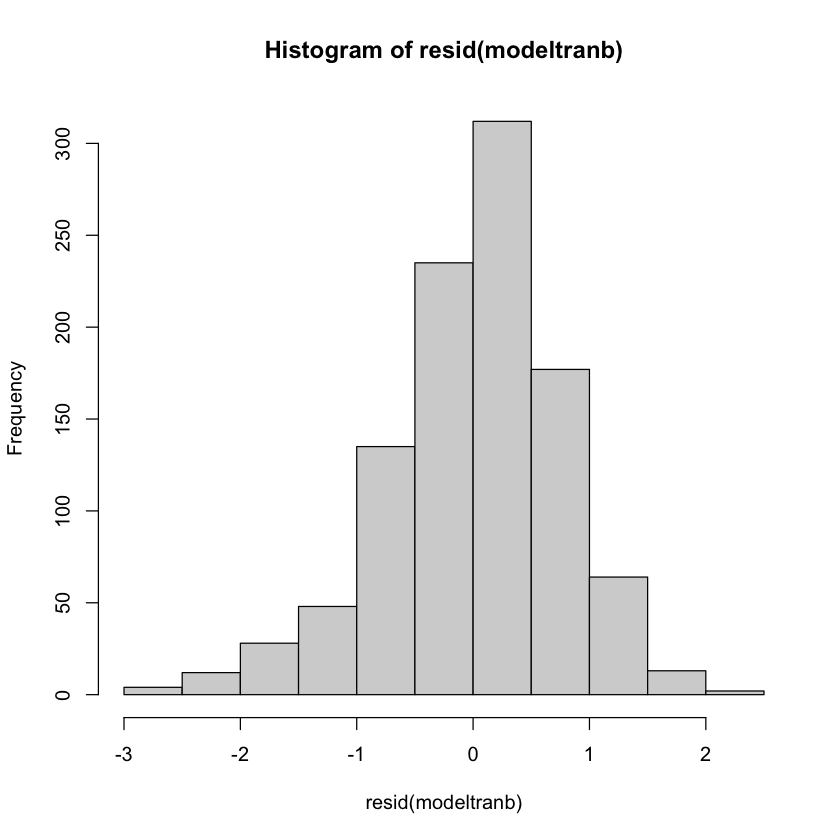

In [21]:
plot(modeltranb)
hist(resid(modeltranb))

We see that the transformed model violates assumptions of multiple-linear regression looking at the plot. This is indicated in the Q-Q plot, in the residual vs fitted plot (with decent but poor behavior overall). 

In [22]:
shapiro.test(resid(modeltranb))


	Shapiro-Wilk normality test

data:  resid(modeltranb)
W = 0.98016, p-value = 1.209e-10


Running a shapiro test shows that the model only becomes worse after transforming the response. We then conclude that is best not to transform the data since we already had satisfaction of assumptions for a multiple linear regression model.

## Residual vs predictor scatterplot

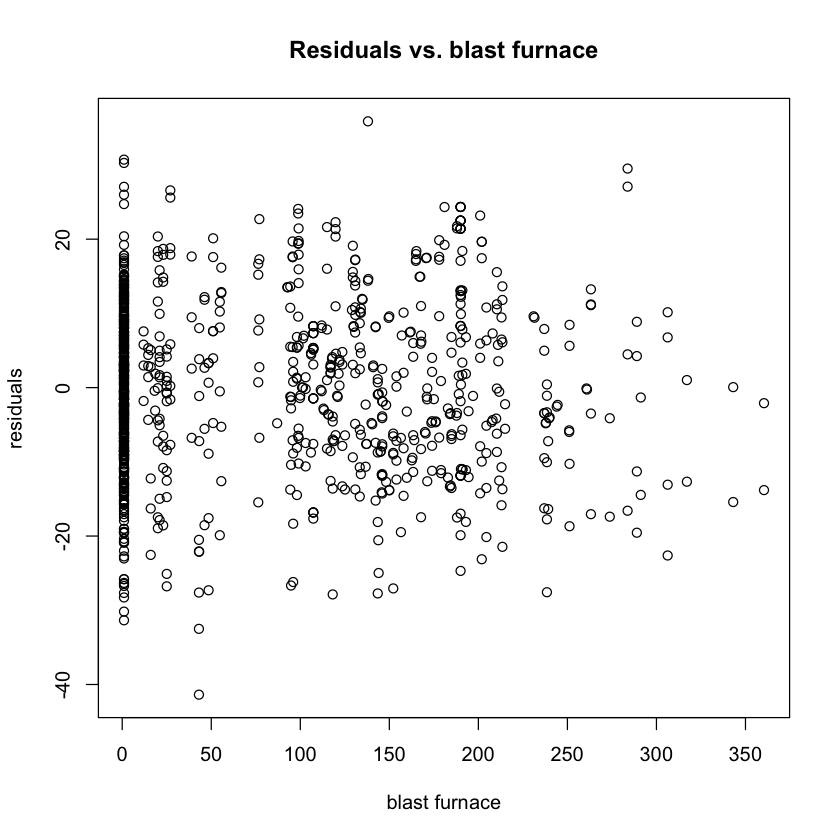

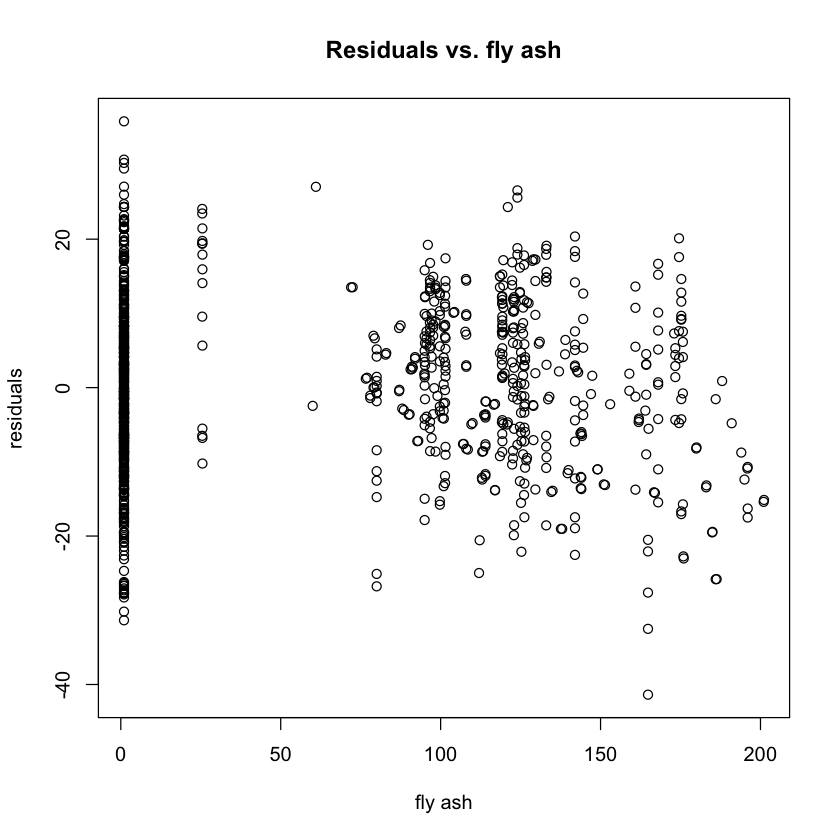

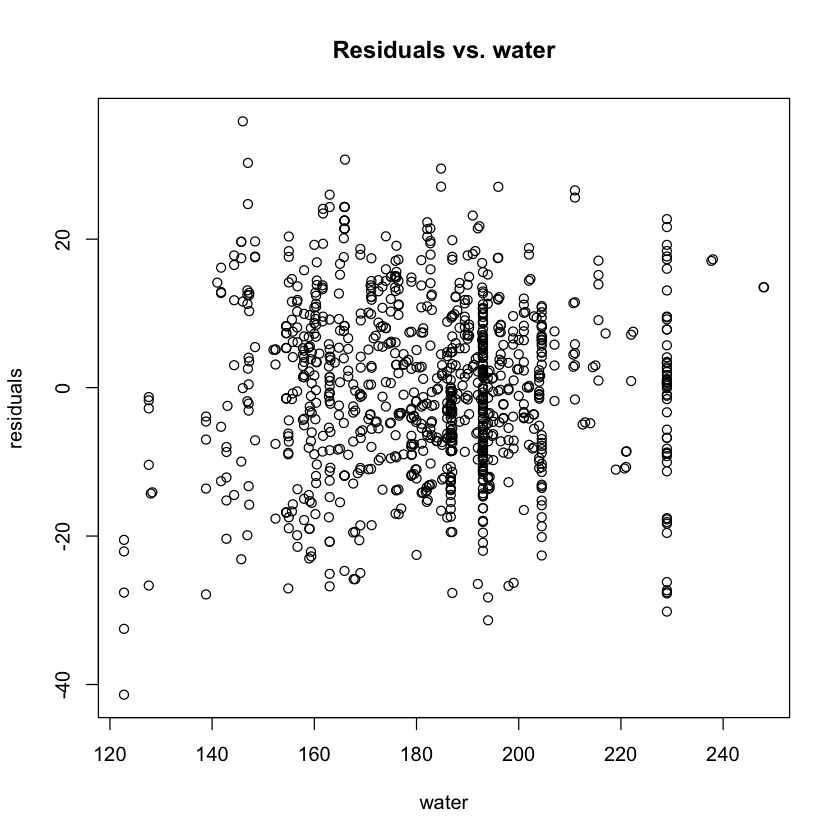

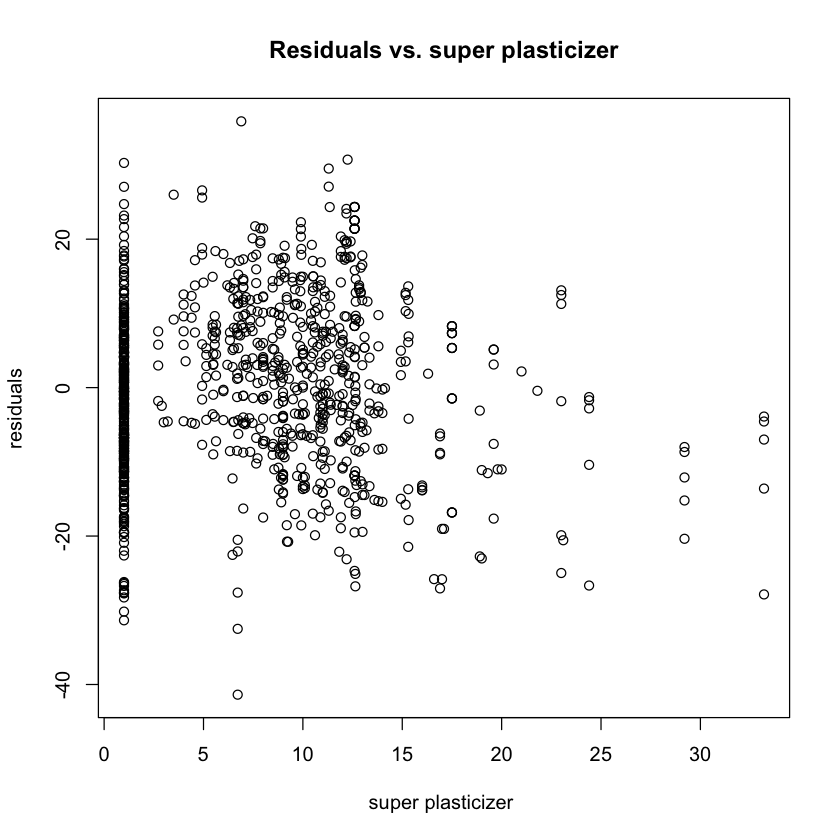

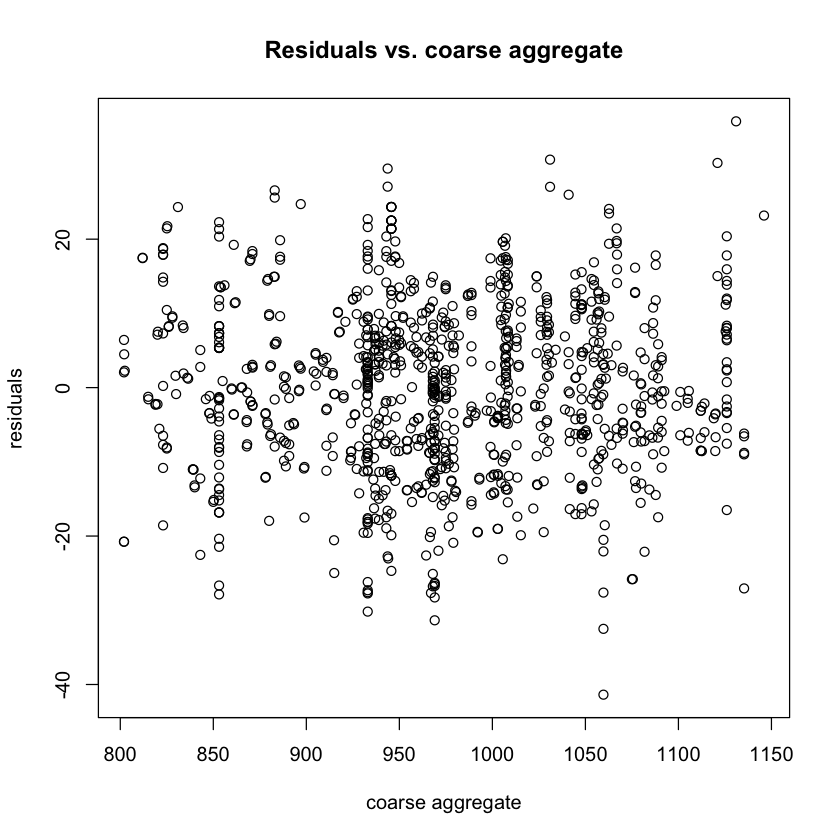

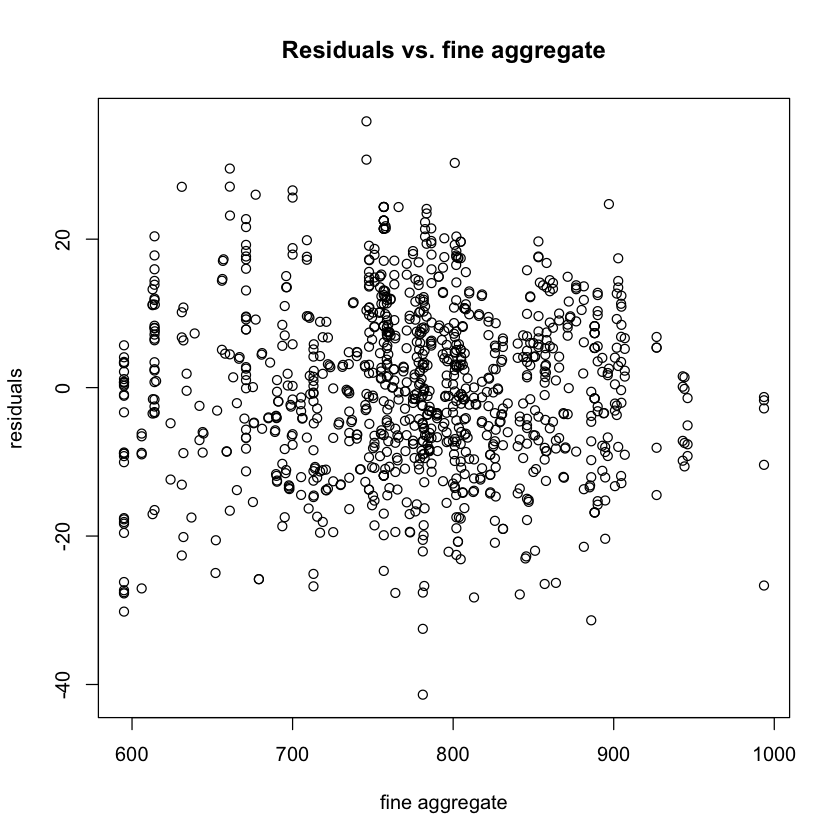

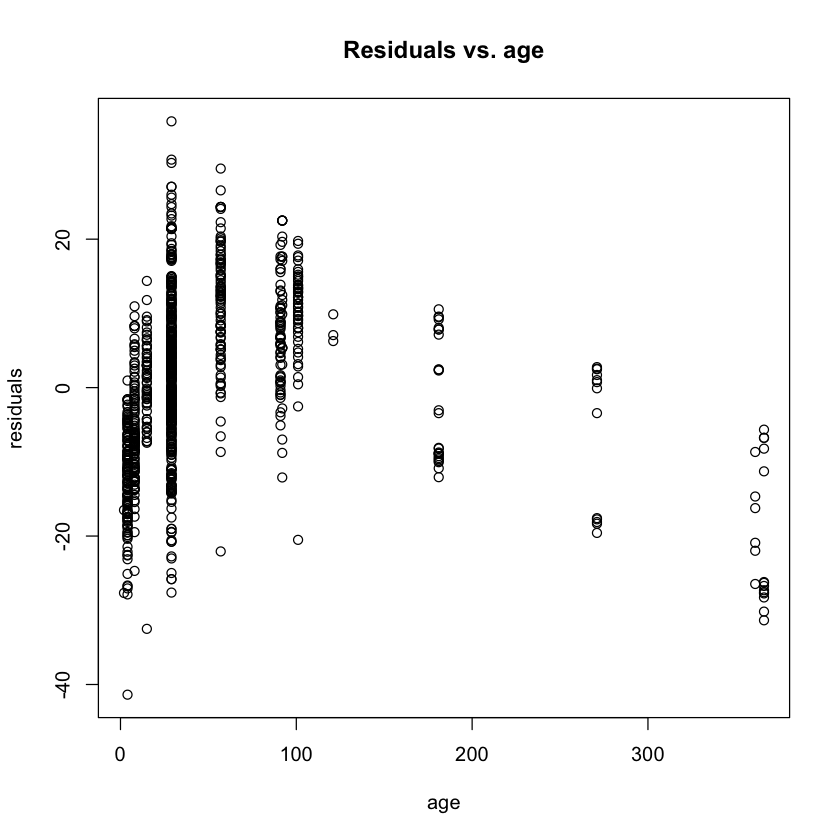

In [23]:
plot(blast2, resid(model23), main = "Residuals vs. blast furnace",
 xlab = "blast furnace", ylab = "residuals")
plot(flyash2, resid(model23), main = "Residuals vs. fly ash",
 xlab = "fly ash", ylab = "residuals")
plot(water2, resid(model23), main = "Residuals vs. water",
 xlab = "water", ylab = "residuals")
plot(superplast2, resid(model23), main = "Residuals vs. super plasticizer",
 xlab = "super plasticizer ", ylab = "residuals")
plot(coarseagg2, resid(model23), main = "Residuals vs. coarse aggregate",
 xlab = "coarse aggregate", ylab = "residuals")
plot(fineagg2, resid(model23), main = "Residuals vs. fine aggregate",
 xlab = "fine aggregate", ylab = "residuals")
plot(age2, resid(model23), main = "Residuals vs. age",
 xlab = "age", ylab = "residuals")

We plot the residuals vs predictor plots to get an idea of behavior of the predictors in the model. It seems that overall the model is well behaved only though not necessarily ideal.

## Selection of Model 

We want to choose the best model using backward selection methods and proceeed from there, we start with the full model, although we removed some predictor in the past. It seems that for the most part the predictors are well behaved, witht the exception of age, it seems that there is a quadratic form going on, it also seems that we might hvae possible outliers occurring, something that we will address after choosing the best model. 

In [24]:
  #limited to the model we chose at the beginning using ivf conditions
mod.0<-lm(strength~1,concrete2)

#forward using aic 
step(mod.0, scope = list(lower = mod.0, upper =  model23), 
     direction = "forward") #Uses AIC by default

Start:  AIC=5801.44
strength ~ 1

              Df Sum of Sq    RSS    AIC
+ superplast2  1     38490 248683 5655.2
+ age2         1     31061 256112 5685.5
+ water2       1     24087 263086 5713.2
+ fineagg2     1      8033 279140 5774.2
+ coarseagg2   1      7811 279362 5775.0
+ blast2       1      5220 281953 5784.5
+ flyash2      1      3212 283961 5791.9
<none>                     287173 5801.4

Step:  AIC=5655.22
strength ~ superplast2

             Df Sum of Sq    RSS    AIC
+ age2        1     47584 201099 5438.5
+ flyash2     1     19919 228764 5571.2
+ fineagg2    1     18688 229995 5576.8
+ blast2      1      4071 244612 5640.2
+ coarseagg2  1      1406 247277 5651.4
+ water2      1      1210 247473 5652.2
<none>                    248683 5655.2

Step:  AIC=5438.46
strength ~ superplast2 + age2

             Df Sum of Sq    RSS    AIC
+ flyash2     1   14890.9 186208 5361.2
+ fineagg2    1   12471.3 188627 5374.5
+ water2      1    6563.3 194535 5406.3
+ blast2      1    516


Call:
lm(formula = strength ~ superplast2 + age2 + flyash2 + fineagg2 + 
    water2 + coarseagg2 + blast2, data = concrete2)

Coefficients:
(Intercept)  superplast2         age2      flyash2     fineagg2       water2  
  302.07197      0.27845      0.10952     -0.06822     -0.10942     -0.54927  
 coarseagg2       blast2  
   -0.08504     -0.02337  


The model suggested using the forward selection process is one that uses all the predictors  Now we test to see what the suggested model is for the backwards selection process.

In [25]:
#backward using aic 
step(model23, scope = list(lower = mod.0, upper = model23), direction = 'backward')

Start:  AIC=5014.54
strength2 ~ blast2 + flyash2 + water2 + superplast2 + coarseagg2 + 
    fineagg2 + age2

              Df Sum of Sq    RSS    AIC
<none>                     131961 5014.5
- superplast2  1       960 132922 5020.0
- blast2       1      2753 134714 5033.8
- flyash2      1     14027 145988 5116.6
- coarseagg2   1     22416 154377 5174.1
- water2       1     40045 172007 5285.5
- fineagg2     1     42858 174819 5302.2
- age2         1     44207 176169 5310.1



Call:
lm(formula = strength2 ~ blast2 + flyash2 + water2 + superplast2 + 
    coarseagg2 + fineagg2 + age2)

Coefficients:
(Intercept)       blast2      flyash2       water2  superplast2   coarseagg2  
  303.07197     -0.02337     -0.06822     -0.54927      0.27845     -0.08504  
   fineagg2         age2  
   -0.10942      0.10952  


The model suggested by backward selection is a model that inlcludes all the predictors. We continue to see what model is suggested by the using stepwise selection method.

In [26]:
step(mod.0, scope = list(lower = mod.0, upper = model23))

Start:  AIC=5801.44
strength ~ 1

              Df Sum of Sq    RSS    AIC
+ superplast2  1     38490 248683 5655.2
+ age2         1     31061 256112 5685.5
+ water2       1     24087 263086 5713.2
+ fineagg2     1      8033 279140 5774.2
+ coarseagg2   1      7811 279362 5775.0
+ blast2       1      5220 281953 5784.5
+ flyash2      1      3212 283961 5791.9
<none>                     287173 5801.4

Step:  AIC=5655.22
strength ~ superplast2

              Df Sum of Sq    RSS    AIC
+ age2         1     47584 201099 5438.5
+ flyash2      1     19919 228764 5571.2
+ fineagg2     1     18688 229995 5576.8
+ blast2       1      4071 244612 5640.2
+ coarseagg2   1      1406 247277 5651.4
+ water2       1      1210 247473 5652.2
<none>                     248683 5655.2
- superplast2  1     38490 287173 5801.4

Step:  AIC=5438.46
strength ~ superplast2 + age2

              Df Sum of Sq    RSS    AIC
+ flyash2      1     14891 186208 5361.2
+ fineagg2     1     12471 188627 5374.5
+ water2  


Call:
lm(formula = strength ~ superplast2 + age2 + flyash2 + fineagg2 + 
    water2 + coarseagg2 + blast2, data = concrete2)

Coefficients:
(Intercept)  superplast2         age2      flyash2     fineagg2       water2  
  302.07197      0.27845      0.10952     -0.06822     -0.10942     -0.54927  
 coarseagg2       blast2  
   -0.08504     -0.02337  


In this instance we have that the best model is the one that uses all of the predictors. Further since all model selection process agree that we should include all the predictors in the model we confirm that our best model is one that includes all the predictors. As a check however we look at the results of model selection using regsubsets.

In [27]:
library(leaps)
mod.reg <- regsubsets(cbind(blast2,flyash2,water2,superplast2,coarseagg2,fineagg2, age2),strength2, data=concrete2)
summary.reg <- summary(mod.reg)
names(summary.reg)
summary.reg$which
summary.reg$rsq
summary.reg$adjr2
summary.reg$cp
summary.reg$bic

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

(Intercept) blast2 flyash2 water2 superplast2 coarseagg2 fineagg2 age2 
1 TRUE        FALSE  FALSE   FALSE   TRUE       FALSE      FALSE    FALSE
2 TRUE        FALSE  FALSE   FALSE   TRUE       FALSE      FALSE     TRUE
3 TRUE        FALSE  FALSE    TRUE  FALSE       FALSE       TRUE     TRUE
4 TRUE        FALSE  FALSE    TRUE  FALSE        TRUE       TRUE     TRUE
5 TRUE        FALSE   TRUE    TRUE  FALSE        TRUE       TRUE     TRUE
6 TRUE         TRUE   TRUE    TRUE  FALSE        TRUE       TRUE     TRUE
7 TRUE         TRUE   TRUE    TRUE   TRUE        TRUE       TRUE     TRUE

[1] 0.1340309 0.2997300 0.3667194 0.4914345 0.5275040 0.5371376 0.5404811

[1] 0.1331885 0.2983663 0.3648677 0.4894499 0.5251968 0.5344229 0.5373337

[1] 899.97180 533.44624 386.45728 111.08276  32.86203  13.43608   8.00000

[1] -134.3486 -346.1660 -442.7977 -661.7596 -730.5938 -744.8741 -745.4040

The adjusted R squared and BIC indicate that the best model is the model that includes all the predictors.
The Cp criteria indicates that the best model, is the model that does not include the superplasticizer predictor.
We visualize our findings:

## Selection of Model By plots

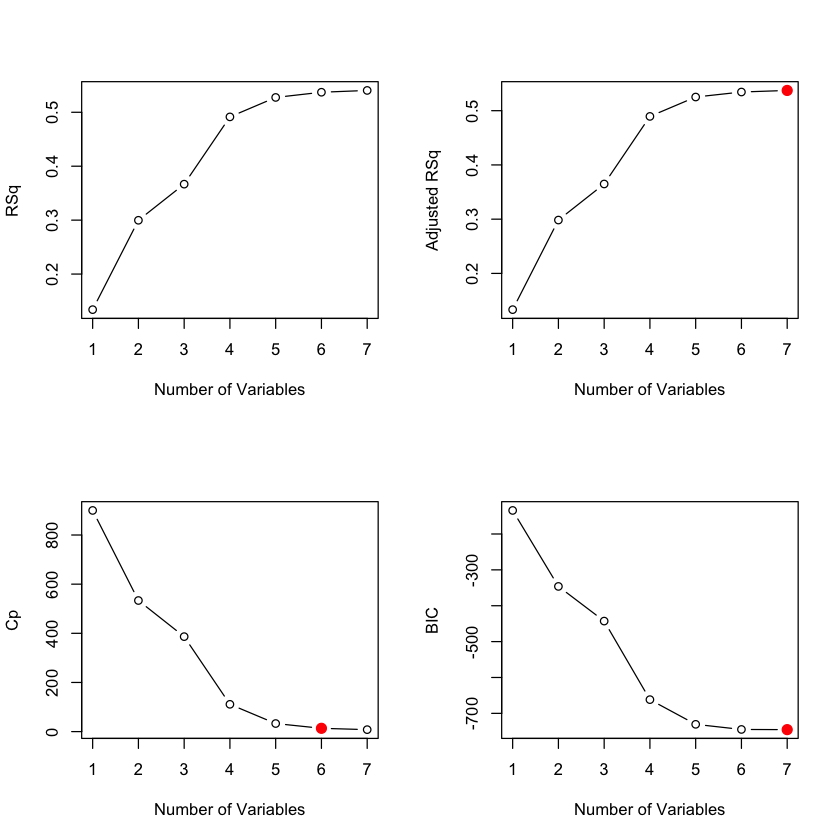

In [28]:
par(mfrow = c(2, 2))
plot(summary.reg$rsq, xlab = "Number of Variables", ylab = "RSq", type = "b")

plot(summary.reg$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "b")
best_adj_r2 = which.max(summary.reg$adjr2)
points(best_adj_r2, summary.reg$adjr2[best_adj_r2],
       col = "red",cex = 2, pch = 20)

plot(summary.reg$cp, xlab = "Number of Variables", ylab = "Cp", type = 'b')
best_cp = which.min(summary.reg$cp[-c(length(summary.reg$cp))])
points(best_cp, summary.reg$cp[best_cp],
       col = "red", cex = 2, pch = 20)

plot(summary.reg$bic, xlab = "Number of Variables", ylab = "BIC", type = 'b')
best_bic = which.min(summary.reg$bic)
points(best_bic, summary.reg$bic[best_bic],
       col = "red", cex = 2, pch = 20)

Using the rsq output we see that the best model to select is the model that includes all 7 of the predictors.
Observing the output of regsubsets and looking at the plots of the criteria we see that the suggested model using the cp criteria is model 6, using the adjusted r squared criteria and the BIC criteria we see that the suggested model is model 7 and using the rsq model criteria we see that the suggested model is model 2. Model 6 pertains to that includes all the predictors except the superplasticizer predictor. Model 7 pertains to the model that includes all of the predictors. and model 3 pertains to the model that includes cement component predictor, superplasticizer predictor, and the age predictor. It seems that the best model to draw from is the model 
We conclude that the best current model then is the model that includes all of the seven predictors.This was the model that we initially looked at, we have already seen that the model satisfies the assumptions of linear regression. We plot a fitted vs residuals plot however to double check before moving on to test for interactions.

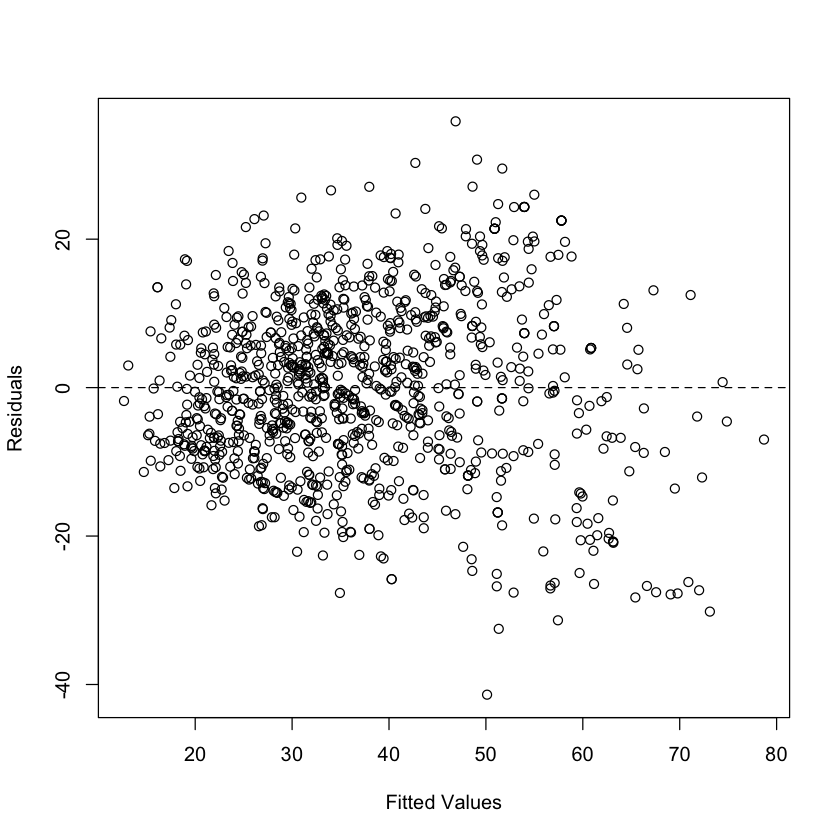

In [29]:
e<-resid(model23)
yhat<-fitted(model23)
plot(yhat, e, xlab = 'Fitted Values', ylab = 'Residuals')
abline(h = 0, lty = 2)

We see that the residuals v.s fitted plot shows values that plot around the zero residual line with even spread. With some possible outliers in the data. It seems that apart from the possible outliers the variance is pretty constant as well.
plotting to check for normality.

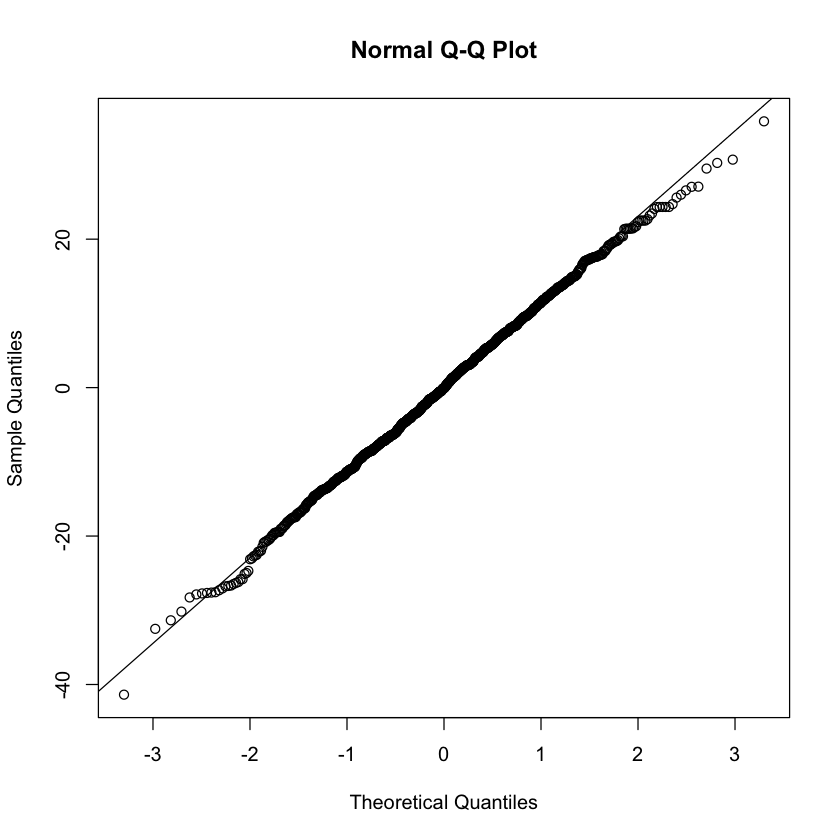

In [30]:
qqnorm(e)
qqline(e)

the normality seems exceptionally well. It does seem however that some points might deviate from the line this might be an indicator of outliers which we will test for later. We confirm this visual conclusion with a more theoretical approach using the shapiro.test.

In [31]:
shapiro.test(e)


	Shapiro-Wilk normality test

data:  e
W = 0.99881, p-value = 0.7373


we have an extremely large p-value, which concfirms the conclusion that the residuals are normal.
We move on to test for whether inclusion of interactions should be included in the model.
We begin by plotting the predictor vs residuals plot, to get a visual of possible significant interactions in the predictors of the model.

## Interaction Terms

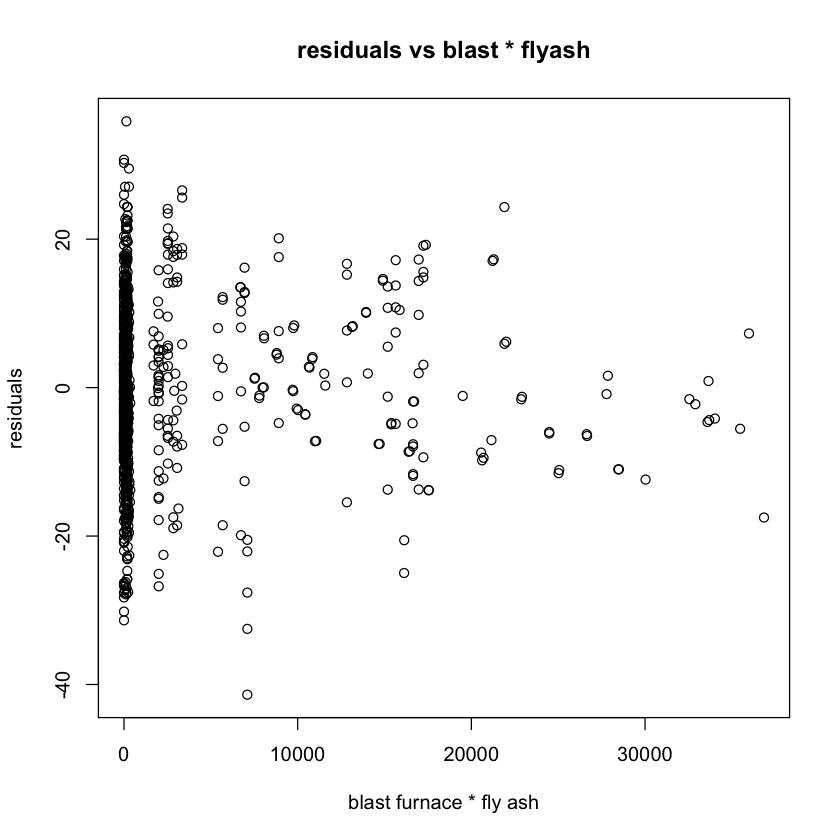

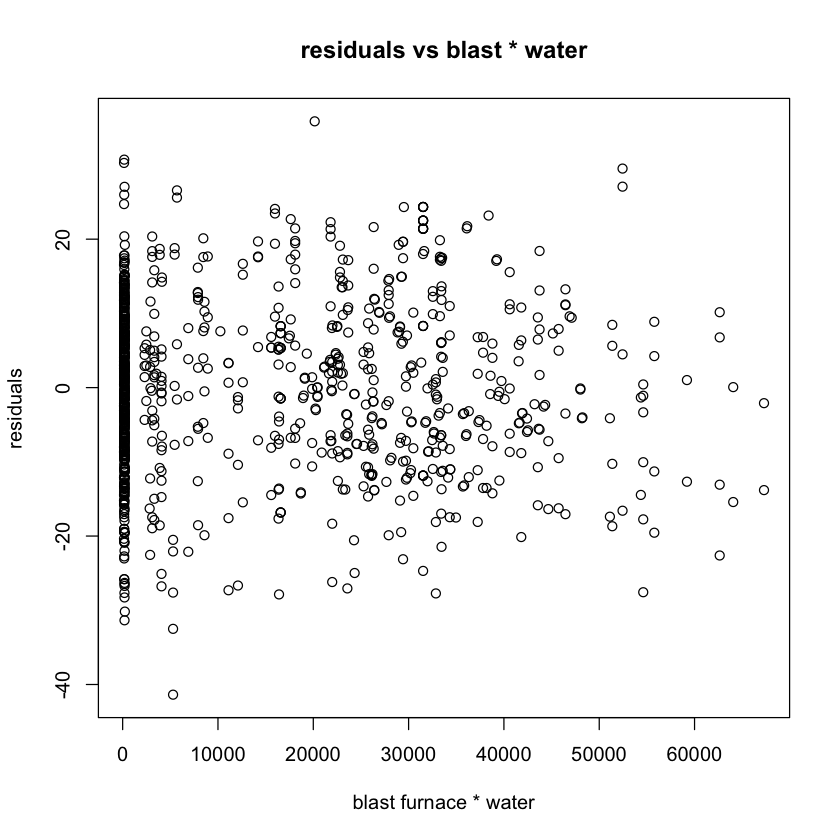

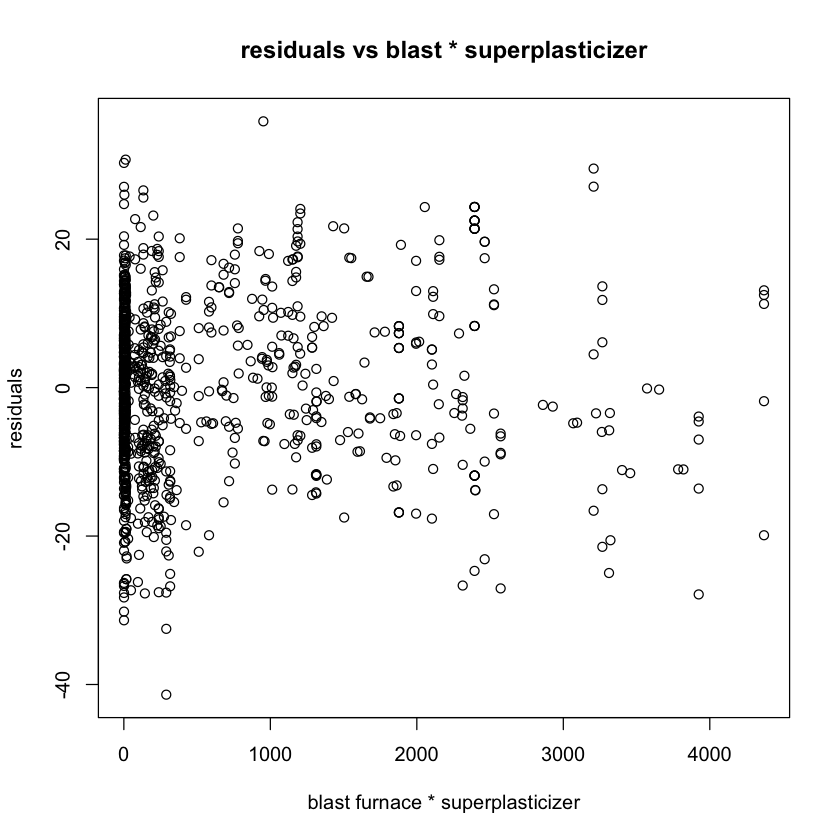

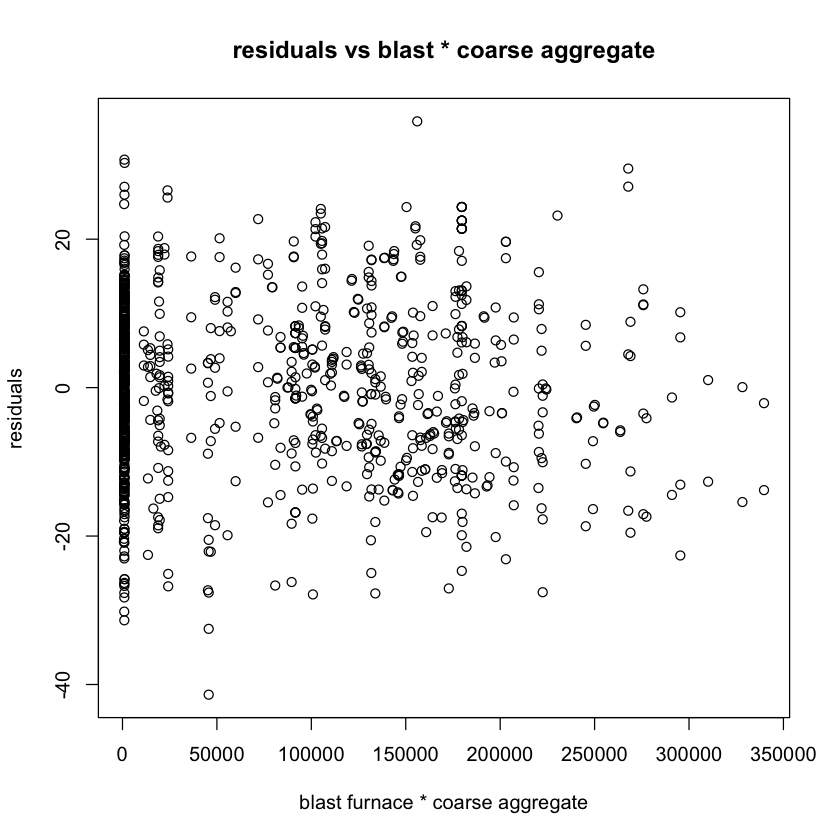

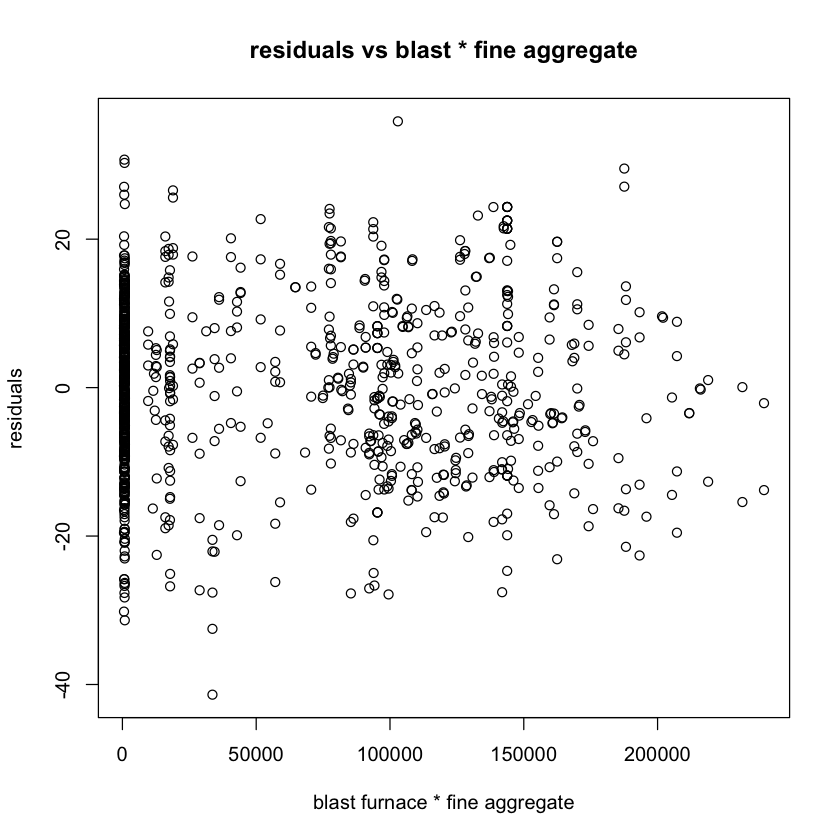

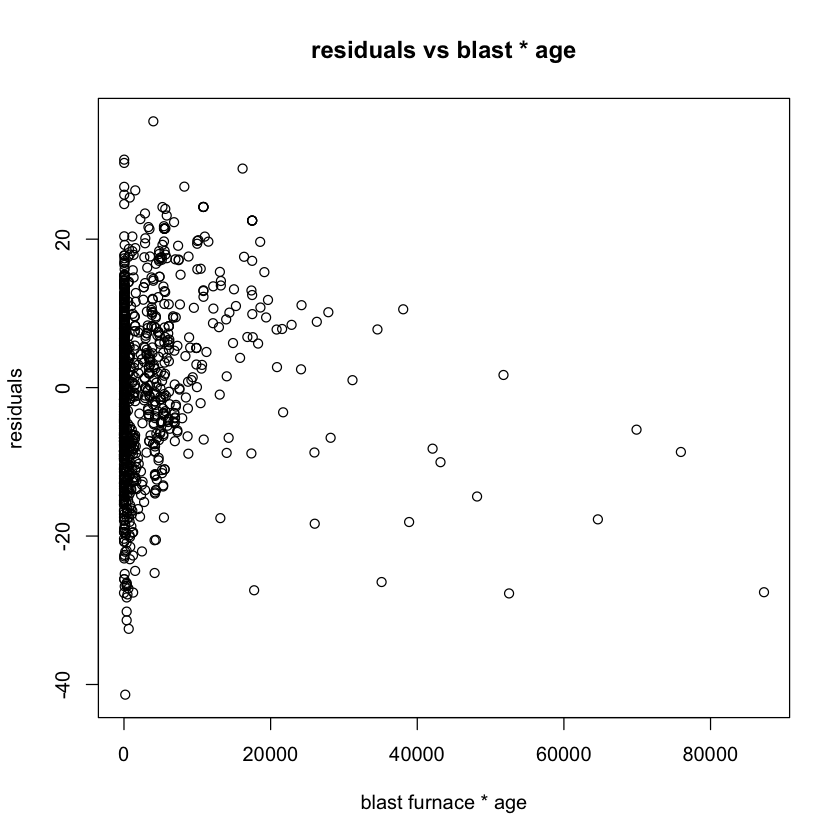

In [32]:
plot((blast2)*(flyash2),resid(model23), xlab = "blast furnace * fly ash", ylab = "residuals",
     main = "residuals vs blast * flyash")
plot((blast2)*(water2),resid(model23), xlab = "blast furnace * water", ylab = "residuals",
     main = "residuals vs blast * water")
plot((blast2)*(superplast2),resid(model23), xlab = "blast furnace * superplasticizer", ylab = "residuals",
     main = "residuals vs blast * superplasticizer")
plot((blast2)*(coarseagg2),resid(model23), xlab = "blast furnace * coarse aggregate", ylab = "residuals",
     main = "residuals vs blast * coarse aggregate")
plot((blast2)*(fineagg2),resid(model23), xlab = "blast furnace * fine aggregate", ylab = "residuals",
     main = "residuals vs blast * fine aggregate")
plot((blast2)*(age2),resid(model23), xlab = "blast furnace * age", ylab = "residuals",
     main = "residuals vs blast * age")

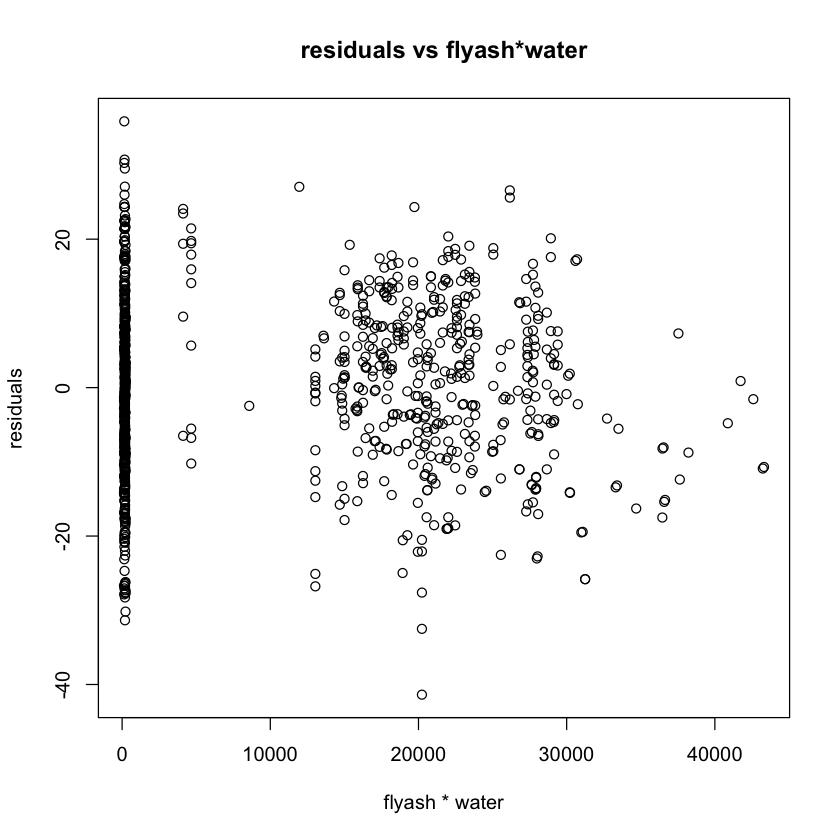

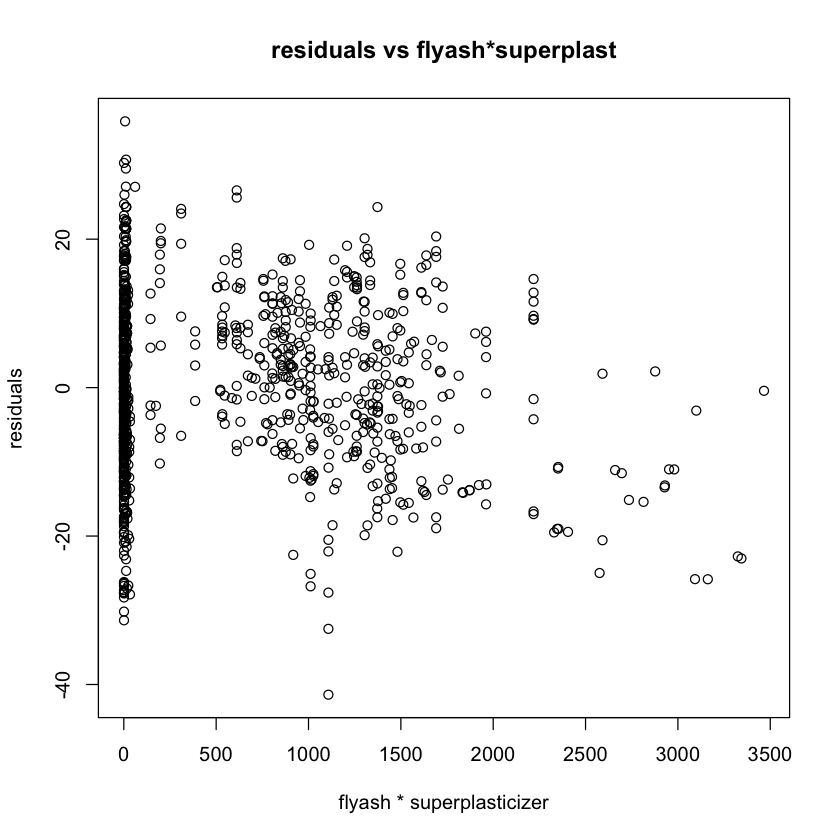

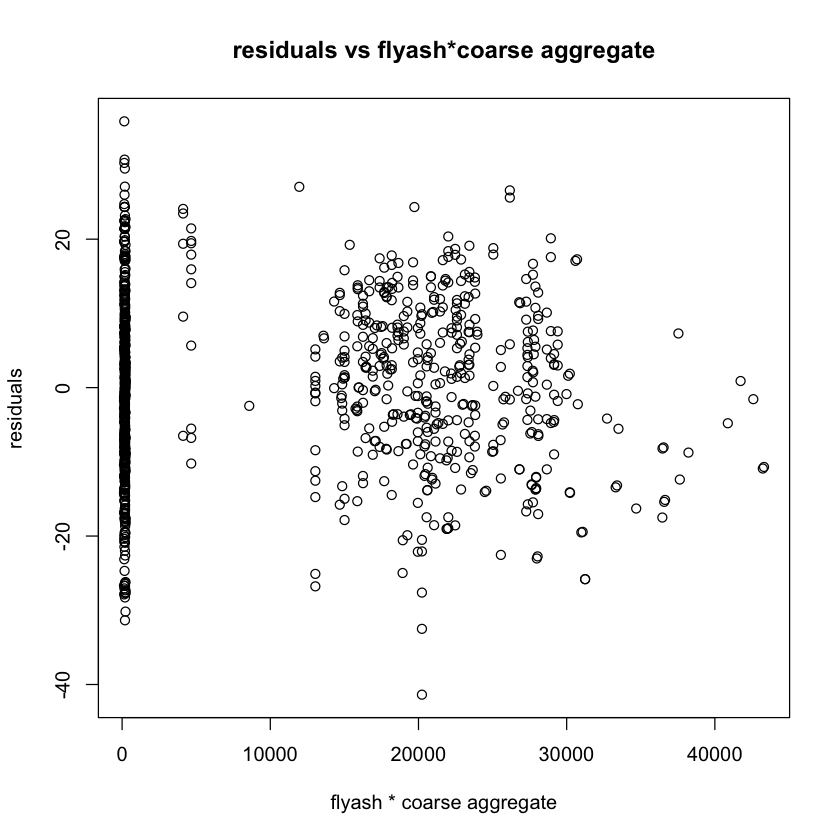

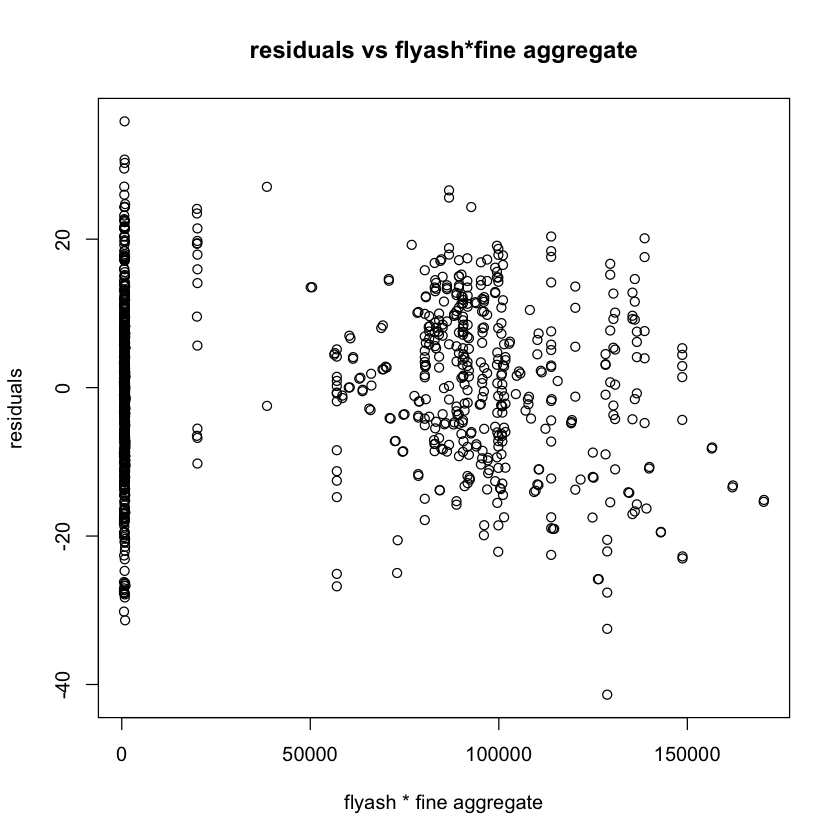

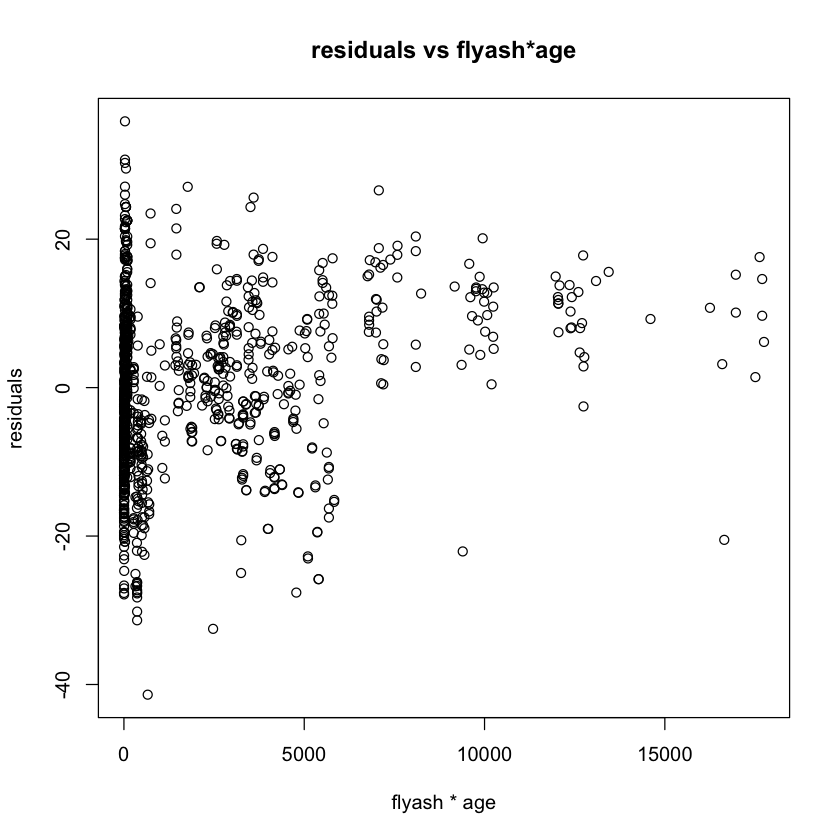

In [33]:
plot(flyash2*water2,e,
 xlab = "flyash * water", ylab = "residuals",
 main = "residuals vs flyash*water")
plot(flyash2*superplast2,e,
 xlab = "flyash * superplasticizer", ylab = "residuals",
 main = "residuals vs flyash*superplast")
plot(flyash2*water2,e,
 xlab = "flyash * coarse aggregate", ylab = "residuals",
 main = "residuals vs flyash*coarse aggregate")
plot(flyash2*fineagg2,e,
 xlab = "flyash * fine aggregate", ylab = "residuals",
 main = "residuals vs flyash*fine aggregate")
plot(flyash2*age2,e,
 xlab = "flyash * age", ylab = "residuals",
 main = "residuals vs flyash*age")

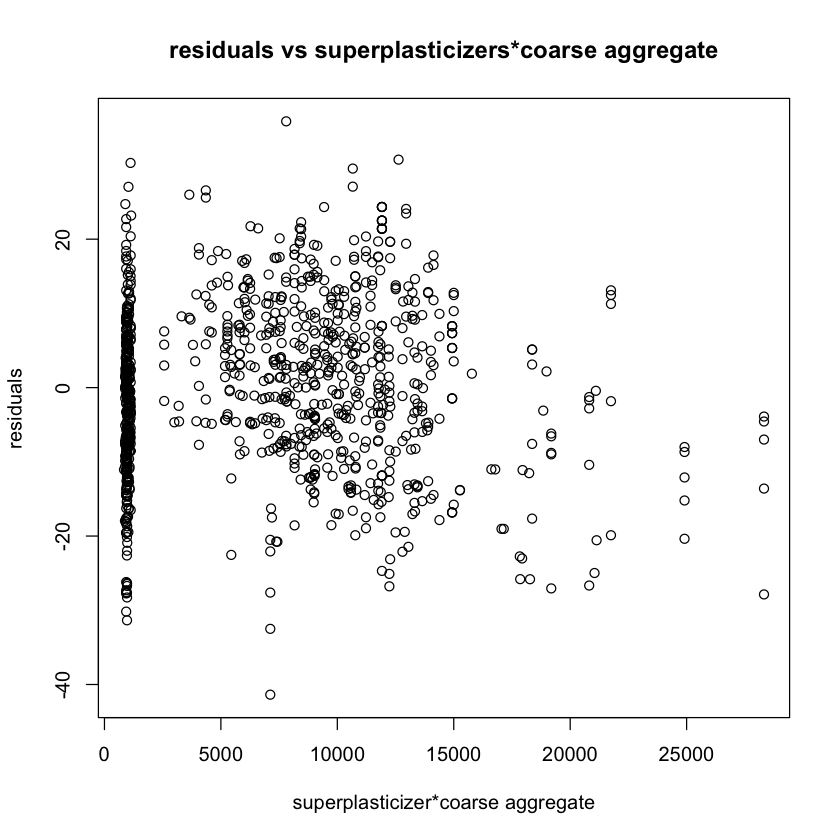

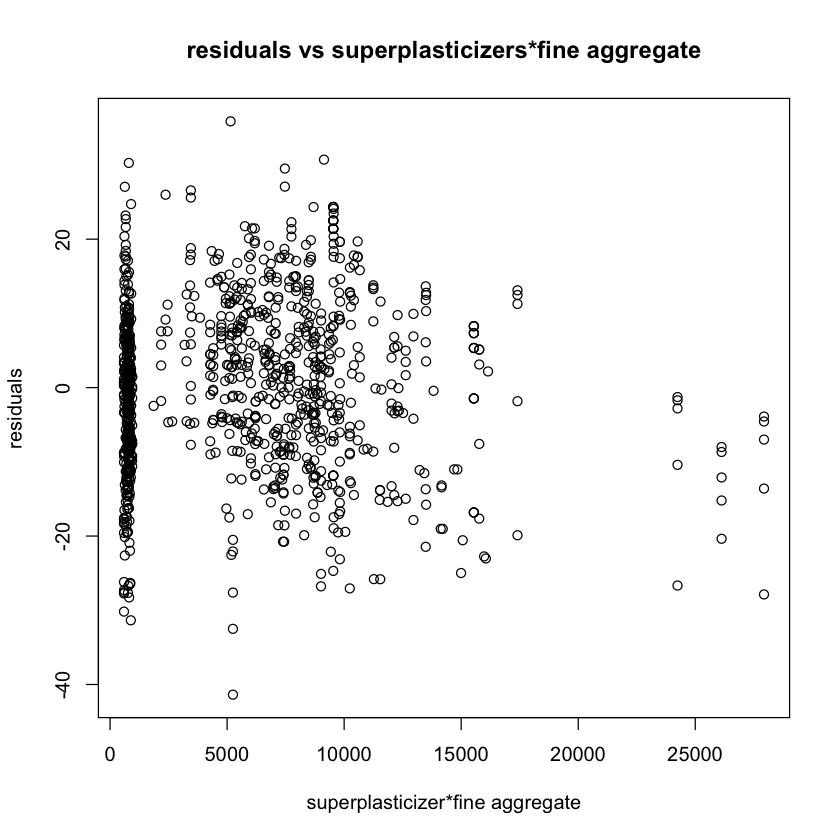

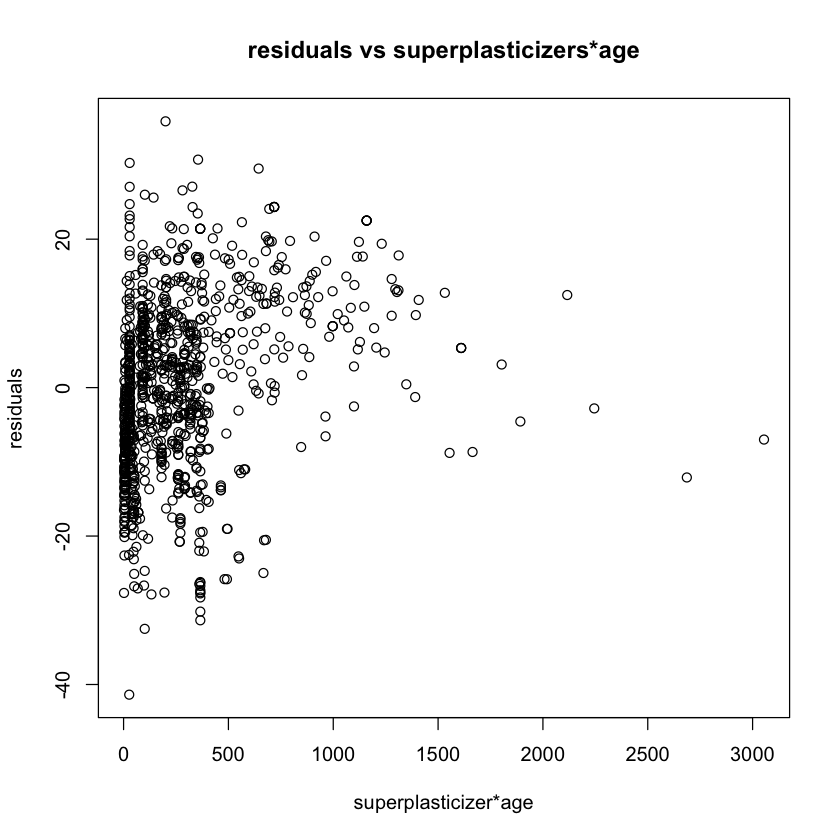

In [35]:
plot(superplast2*coarseagg2, resid(model23),
 xlab = "superplasticizer*coarse aggregate", ylab = "residuals",
 main = "residuals vs superplasticizers*coarse aggregate")
plot(superplast2*fineagg2, resid(model23),
 xlab = "superplasticizer*fine aggregate", ylab = "residuals",
 main = "residuals vs superplasticizers*fine aggregate")
plot(superplast2*age2, resid(model23),
 xlab = "superplasticizer*age", ylab = "residuals",
 main = "residuals vs superplasticizers*age")

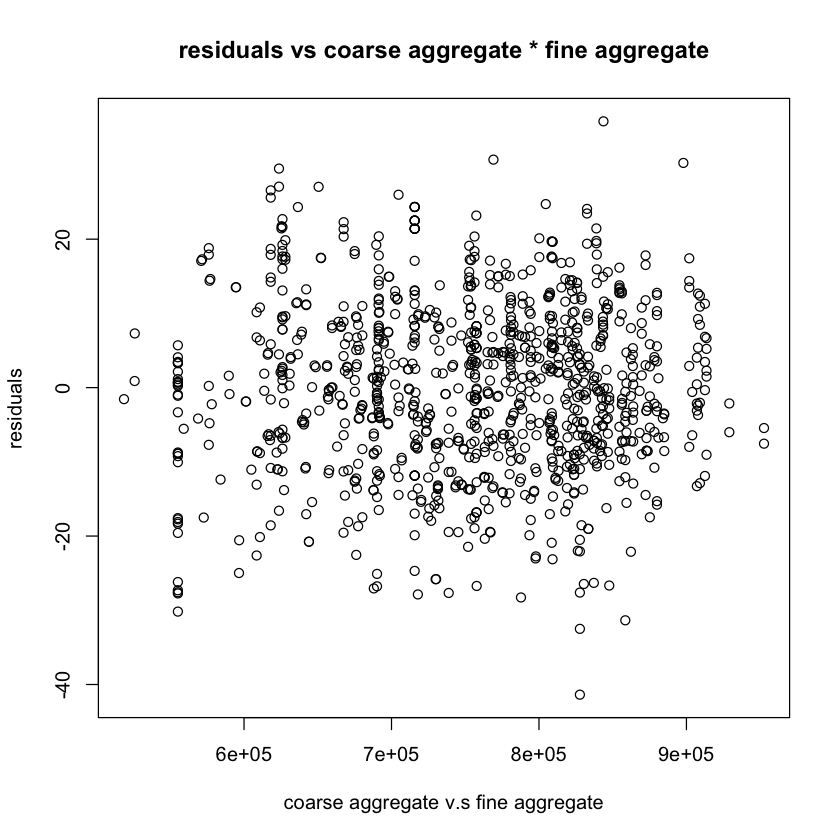

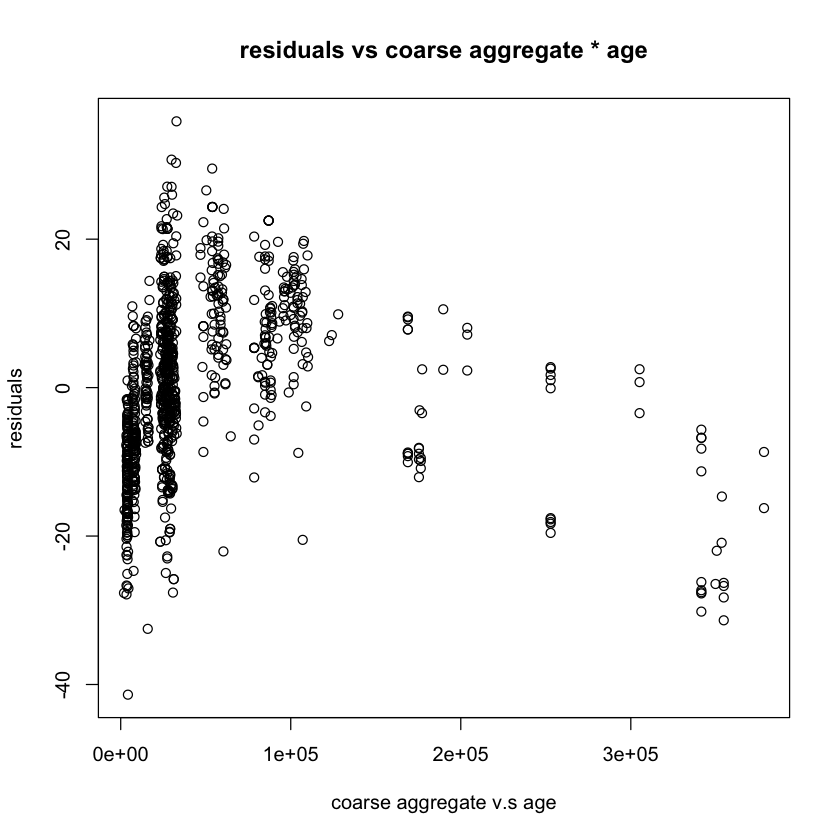

In [36]:
plot(coarseagg2*fineagg2, resid(model23),
 xlab = "coarse aggregate v.s fine aggregate", ylab = "residuals",
 main = "residuals vs coarse aggregate * fine aggregate")
plot(coarseagg2*age2, resid(model23),
 xlab = "coarse aggregate v.s age", ylab = "residuals",
 main = "residuals vs coarse aggregate * age")

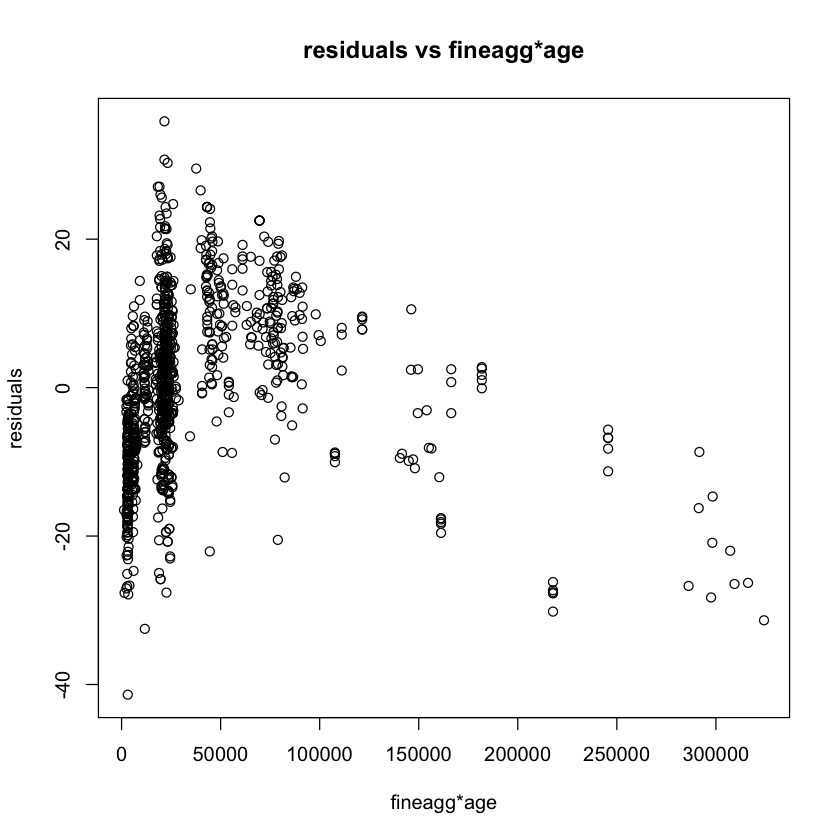

In [37]:
plot(fineagg2*age2, resid(model23),
 xlab = "fineagg*age", ylab = "residuals",
 main = "residuals vs fineagg*age")

It seems that in many there are possible interactions between multiple of the predictors, we run tests on all possible interactions in the model, to see which ones should be included or exlcuded in the model.

In [38]:
int1<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+blast2*flyash)
int2<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+blast2*water2)
int3<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+blast2*superplast2)
int4<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+blast2*coarseagg2)
int5<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+blast2*age2)
int6<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+blast2*fineagg2)

int7<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+flyash2*water2)
int8<-lm(strength2 ~blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+flyash2*superplast2)
int9<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+flyash2*coarseagg2)
int10<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+flyash2*age2)
int11<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+flyash2*fineagg2)


int12<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+water2*superplast2)
int13<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+water2*coarseagg2)
int14<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+water2*age2)
int15<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+water2*fineagg2)



int16<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+superplast2*coarseagg2)
int17<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+superplast2*age2)
int18<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+superplast2*fineagg2)


int19<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+coarseagg2*age2)
int20<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+coarseagg2*fineagg2)

int21<- lm(strength2 ~blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+age2*fineagg2)

In [39]:
anova(model23,int1) #N
anova(model23,int2) #N
anova(model23,int3) #Y
anova(model23,int4) #Y
anova(model23,int5) #Y
anova(model23,int6) #Y
anova(model23,int7) #y
anova(model23,int8) #Y
anova(model23,int9) #N
anova(model23,int10) #y
anova(model23,int11) #Y
anova(model23,int12) #y
anova(model23,int13) #y
anova(model23,int14) #Y
anova(model23,int15) #N
anova(model23,int16) #N
anova(model23,int17) #Y
anova(model23,int18) #N
anova(model23,int19) #Y
anova(model23,int20) #N
anova(model23,int21) #Y

Res.Df RSS      Df Sum of Sq F         Pr(>F)   
1 1022   131961.4 NA       NA         NA        NA
2 1021   131929.4  1 32.04417  0.2479895 0.6186016

Res.Df RSS      Df Sum of Sq F        Pr(>F)    
1 1022   131961.4 NA       NA        NA         NA
2 1021   131567.0  1 394.4116  3.060754 0.08050488

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   130535.6  1 1425.866  11.15259 0.0008694959

Res.Df RSS      Df Sum of Sq F        Pr(>F)     
1 1022   131961.4 NA       NA        NA          NA
2 1021   130765.7  1 1195.751  9.336257 0.002304985

Res.Df RSS      Df Sum of Sq F        Pr(>F)    
1 1022   131961.4 NA       NA        NA         NA
2 1021   131206.4  1 755.0004  5.875134 0.01552908

Res.Df RSS      Df Sum of Sq F        Pr(>F)     
1 1022   131961.4 NA       NA        NA          NA
2 1021   130983.9  1 977.5162  7.619593 0.005877157

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   129893.9  1 2067.554  16.25152 5.958948e-05

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   127200.3  1 4761.086  38.21584 9.142781e-10

Res.Df RSS      Df Sum of Sq F          Pr(>F)   
1 1022   131961.4 NA       NA          NA        NA
2 1021   131957.7  1 3.748155  0.02900071 0.8648111

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   115688.7  1 16272.74  143.6136 4.684378e-31

Res.Df RSS      Df Sum of Sq F       Pr(>F)    
1 1022   131961.4 NA       NA       NA         NA
2 1021   131189.4  1 772.0502  6.00859 0.01440314

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   127757.9  1 4203.574  33.59362 9.043777e-09

Res.Df RSS      Df Sum of Sq F        Pr(>F)    
1 1022   131961.4 NA       NA        NA         NA
2 1021   131416.2  1 545.2685  4.236307 0.03982151

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   116185.4  1 15776.04  138.6348 4.237564e-30

Res.Df RSS      Df Sum of Sq F        Pr(>F)  
1 1022   131961.4 NA       NA        NA       NA
2 1021   131794.4  1 167.0778  1.294338 0.255517

Res.Df RSS      Df Sum of Sq F        Pr(>F)   
1 1022   131961.4 NA       NA        NA        NA
2 1021   131621.0  1 340.4118  2.640615 0.1044718

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   109899.9  1 22061.51  204.9574 1.677225e-42

Res.Df RSS      Df Sum of Sq F         Pr(>F)   
1 1022   131961.4 NA      NA          NA        NA
2 1021   131909.3  1 52.1458   0.4036173 0.5253694

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   129916.7  1 2044.733  16.06931 6.550765e-05

Res.Df RSS      Df Sum of Sq F         Pr(>F)   
1 1022   131961.4 NA      NA          NA        NA
2 1021   131883.5  1 77.9233   0.6032573 0.4375178

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1022   131961.4 NA       NA        NA           NA
2 1021   129467.0  1 2494.461  19.67177 1.019176e-05

Running tests on anova we see that, there are interactions that should be included in the model. The updated model includes the interaction in pairs: (blast, superplasticizer),(blast,coarse aggreagate),(blast,age),(blast,fine aggregate),(fly ash,superplasticizer), (fly ash, age), (fly ash, fine aggregate),(water, superplasticizer),(water,coarse aggregate),(water, age),(superplasticizer,age),(coarse aggregate, age), (age,fine aggregate).

In [40]:
model232<-lm(strength2 ~ blast2+flyash2+water2+superplast2+coarseagg2+age2+fineagg2+blast2*superplast2+blast2*coarseagg2+blast2*age2+blast2*fineagg2+flyash2*water2+flyash2*superplast2+flyash2*age2+flyash2*fineagg2+water2*superplast2+water2*coarseagg2+water2*age2+superplast2*age2+coarseagg2*age2+age2*fineagg2)

Plotting the model, and looking test of normality on the update model we have the following.

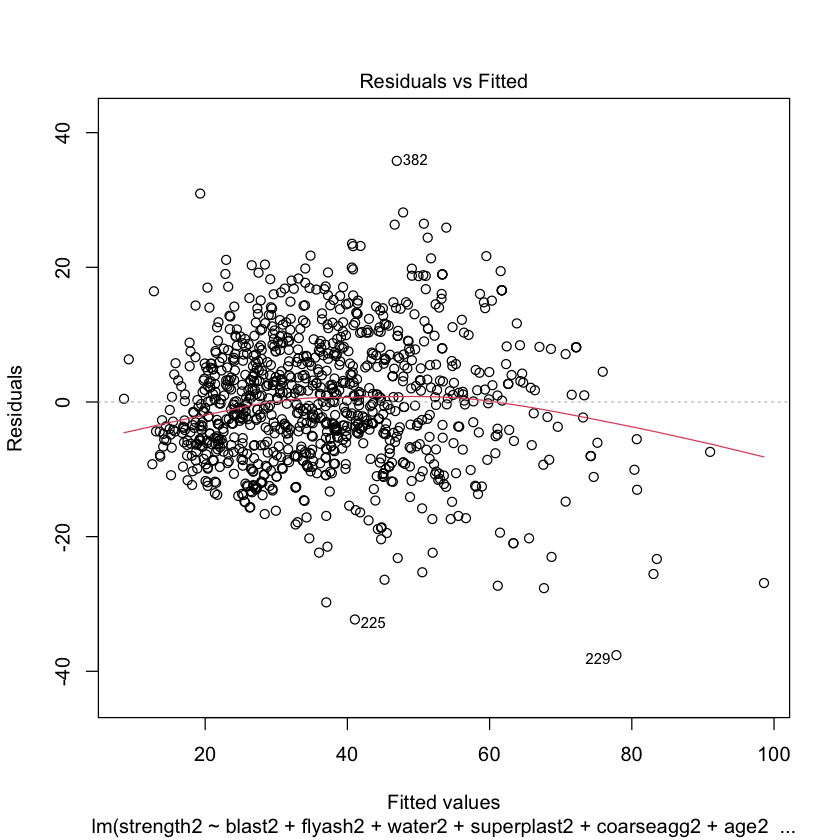

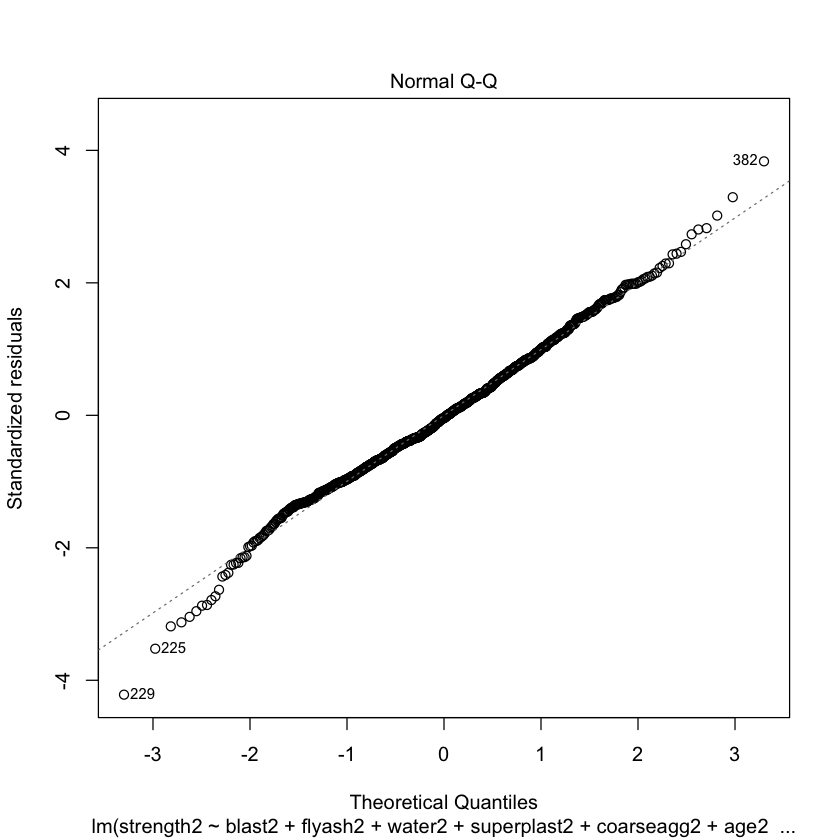

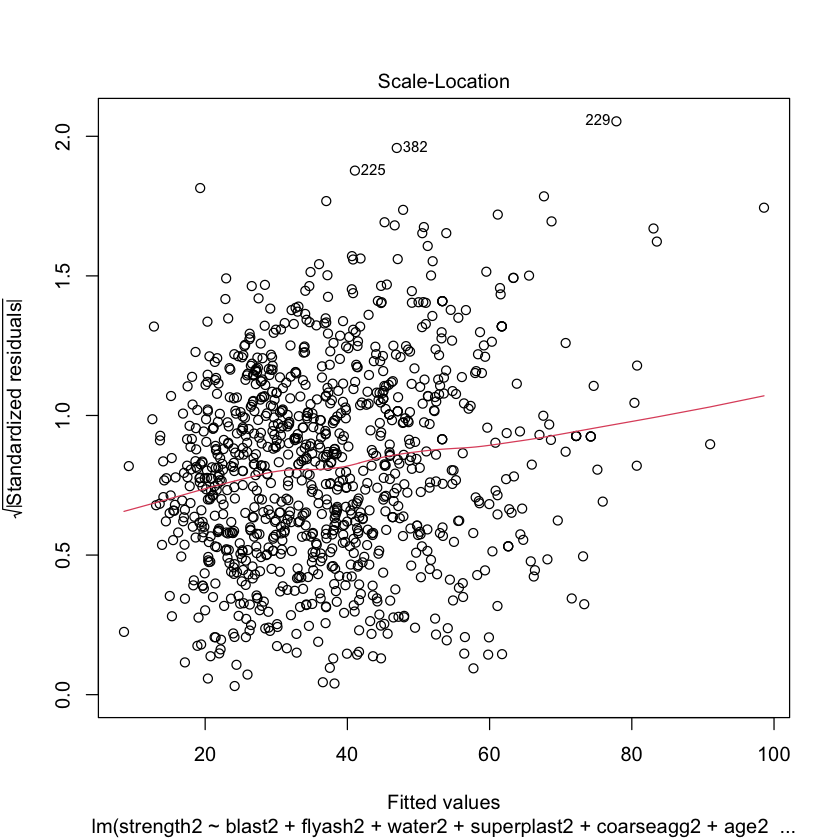


	Shapiro-Wilk normality test

data:  resid(model232)
W = 0.99583, p-value = 0.00686


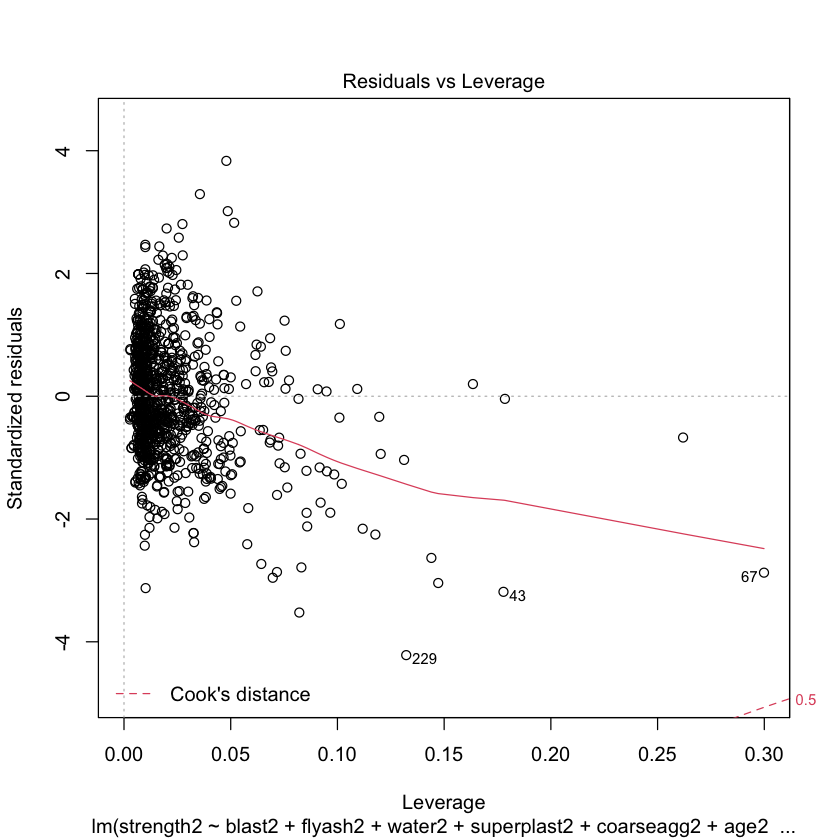

In [42]:
plot(model232)
shapiro.test(resid(model232))

We note that the model looks well behaved with the exception of the Q-Q plot which seems non-normal. We further confirm this with the shapiro test which tells us that the model is not normal. Given that the model showed evidence of requiring and having interaction terms, it seems that the interaction terms should be maintained although normality might be 

## Outliers and leverage points

In [43]:
rs<-abs(rstudent(model232))
which(rs>3);

43 169 225 229 382 396 764 829 
 43 169 225 229 382 396 764 829

These are the possible outliers and high leverage points of the model. We run further tests to focusing first on the outliers. 

In [44]:
outlierTest(model232)

     rstudent unadjusted p-value Bonferroni p
229 -4.252786         2.3077e-05      0.02377

Running a test for outliers we see that our possible outlier is data point 229. We focus on high leverage points now using cooks distance.

In [45]:
cooksd <- cooks.distance(model232)
which(cooksd>4/(1030-8-1))

1   4   5   7   9  15  16  17  18  25  26  36  42  43  44  57  66  67  69  70 
  1   4   5   7   9  15  16  17  18  25  26  36  42  43  44  57  66  67  69  70 
 77  82  86  88 131 134 146 154 155 167 169 172 177 225 226 227 228 229 380 382 
 77  82  86  88 131 134 146 154 155 167 169 172 177 225 226 227 228 229 380 382 
383 384 385 389 392 396 397 401 405 463 467 500 504 510 521 532 605 611 617 621 
383 384 385 389 392 396 397 401 405 463 467 500 504 510 521 532 605 611 617 621 
623 700 747 757 764 770 793 815 829 835 919 954 982 
623 700 747 757 764 770 793 815 829 835 919 954 982

We see that using the cooks distance criteria there are many possible high leverage points, however given the size of our model and the limitations of the test, not all of them can be considered high leverage points. To make a final conclusion on whether the outlier is in fact an outlier and what high leverage points to remove out of the entire set of possible high leverage points we look at an influence index plot of the model.

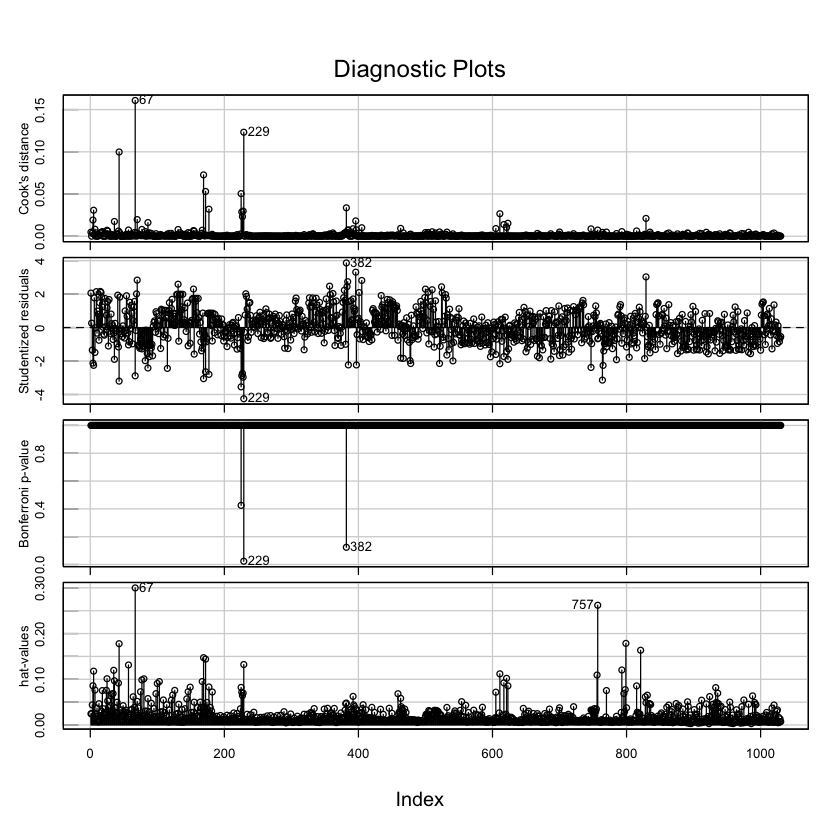

In [46]:
influenceIndexPlot(model232,id=TRUE)

We see that the values that should be considered as the most influential possible outliers and high leverage points are : data point 67,229,382 and 757 therefore we should remove these to get a better model for our data. We remove the outliers and high leverage points to improve normality and accuracy of the model.

In [47]:
concreteup<-concrete2[-c(67,229,382,757),]
concreteup2<-concreteup[-c(224,43,795),]
concreteup3<-concreteup2[-c(5,225),]
concreteup4<-concreteup3[-c(222,223),]
concreteup5<-concreteup4[-c(387),]
concreteup6<-concreteup5[-c(753),]
concreteup7<-concreteup6[-c(816,35),]



blastup<-concreteup$`blast furnace slag`
flyashup<-concreteup$`fly ash`
waterup<-concreteup$water
superplastup<-concreteup$superplasticizer
coarseaggup<-concreteup$`coarse aggregate`
fineaggup<-concreteup$`fine aggregate`
ageup<-concreteup$age
strengthup<-concreteup$`concrete strength`

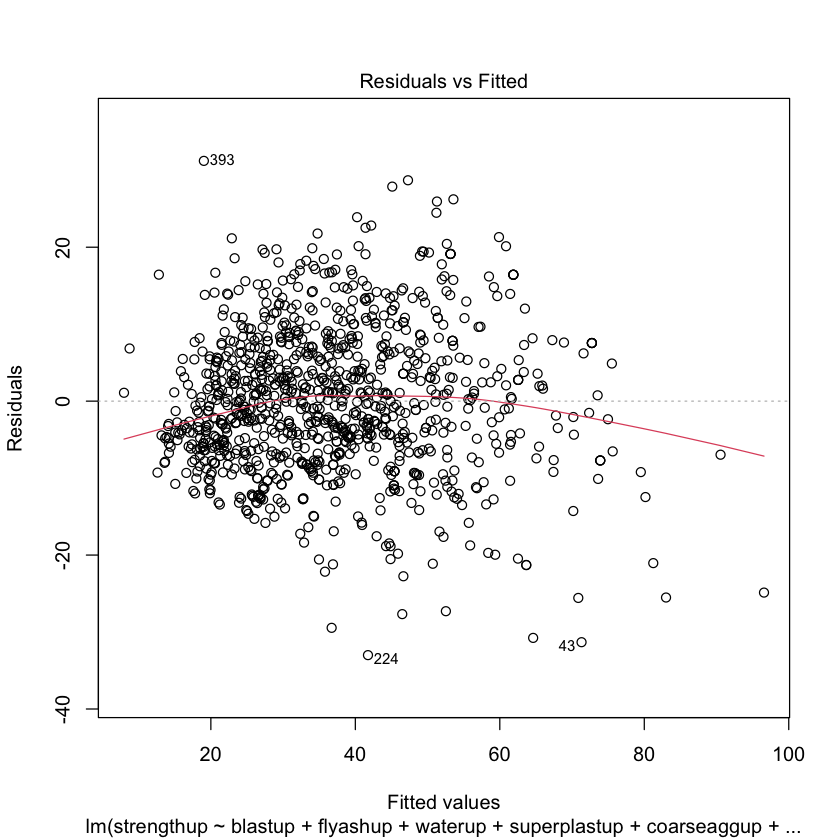

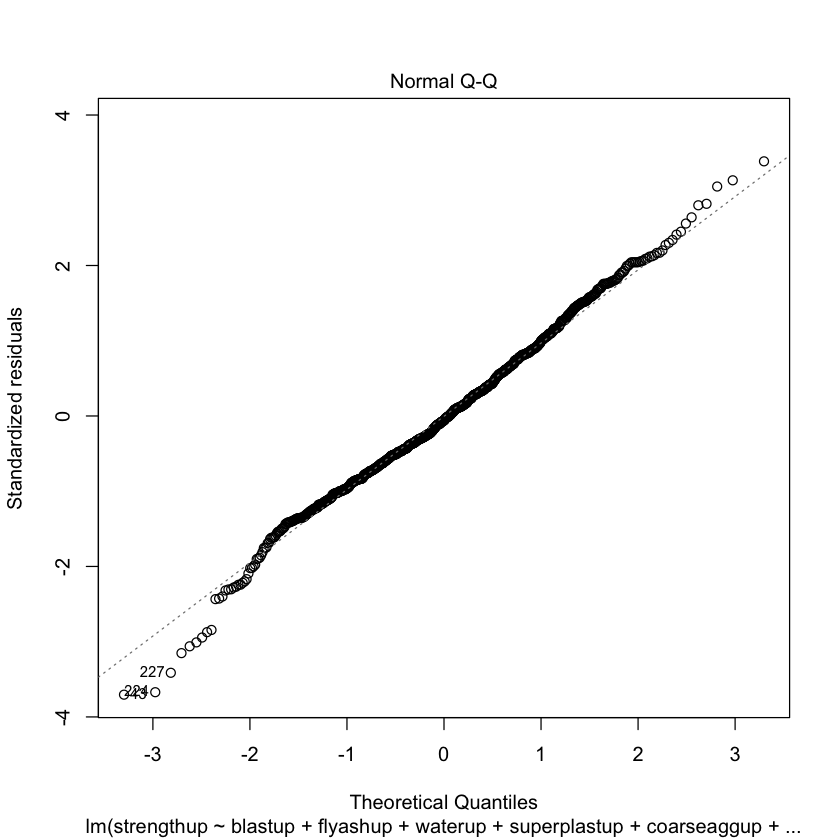

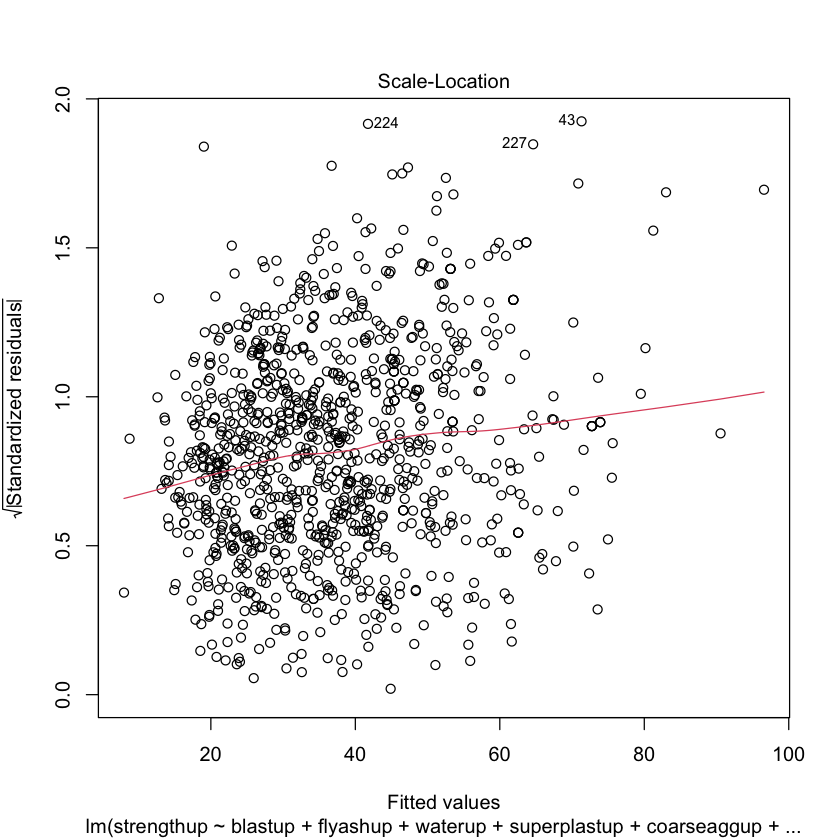


	Shapiro-Wilk normality test

data:  resid(modelup3)
W = 0.99512, p-value = 0.002218


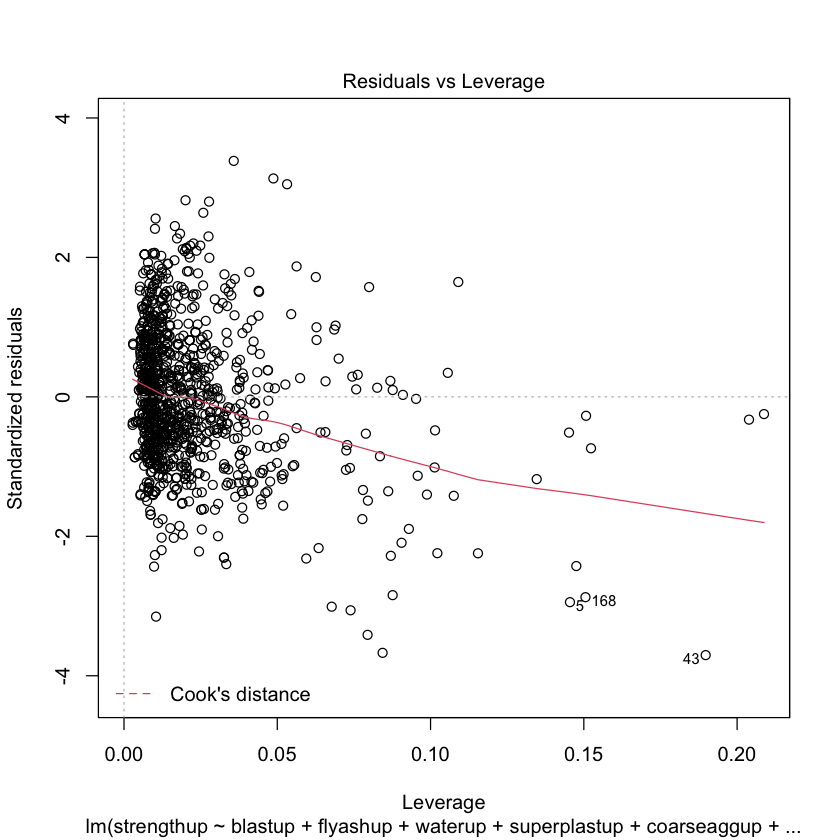


Call:
lm(formula = strengthup ~ blastup + flyashup + waterup + superplastup + 
    coarseaggup + ageup + fineaggup + blastup * superplastup + 
    blastup * coarseaggup + blastup * ageup + blastup * fineaggup + 
    flyashup * waterup + flyashup * superplastup + flyashup * 
    ageup + flyashup * fineaggup + waterup * superplastup + waterup * 
    coarseaggup + waterup * ageup + superplastup * ageup + coarseaggup * 
    ageup + ageup * fineaggup)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.001  -6.158  -0.520   6.096  31.218 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.632e+02  4.402e+01   5.979 3.12e-09 ***
blastup               -5.373e-02  7.247e-02  -0.741 0.458605    
flyashup              -3.130e-01  1.089e-01  -2.874 0.004134 ** 
waterup               -1.079e-01  2.254e-01  -0.479 0.632347    
superplastup          -2.109e+00  5.104e-01  -4.132 3.90e-05 ***
coarseaggup           -1.220e-02  4.206e-02  -0.2

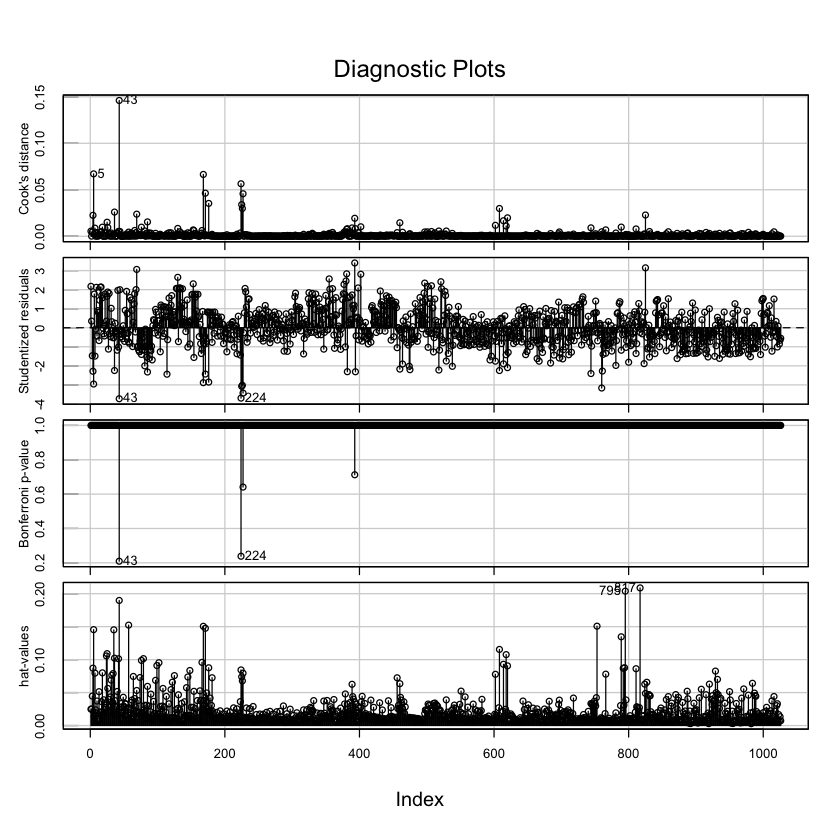

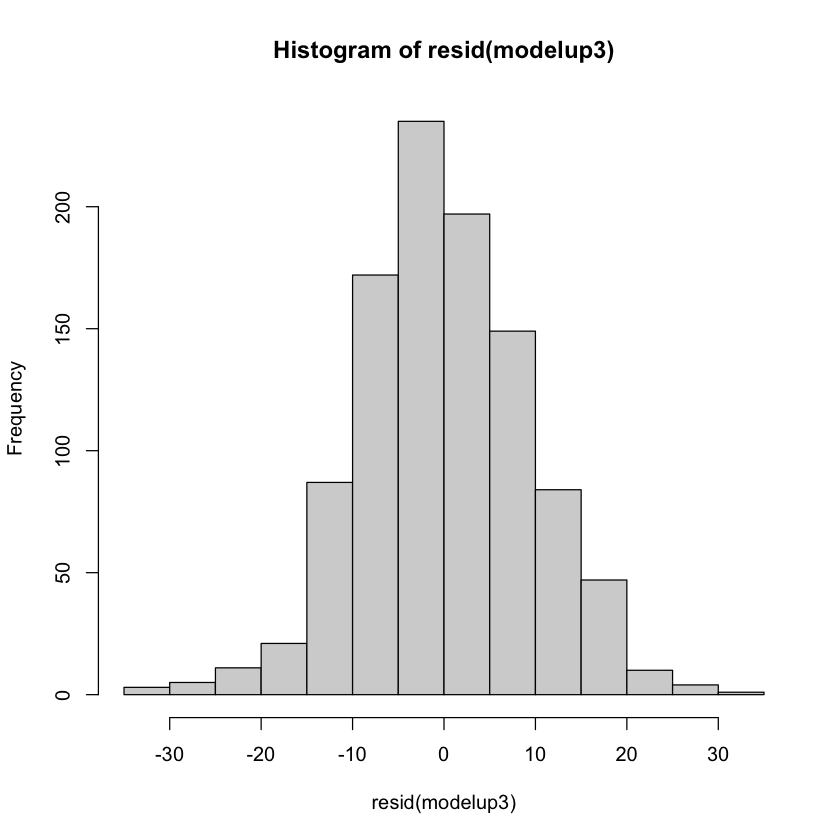

In [48]:
modelup3<-lm(strengthup ~ blastup+flyashup+waterup+superplastup+coarseaggup+ageup+fineaggup+blastup*superplastup+blastup*coarseaggup+blastup*ageup+blastup*fineaggup+flyashup*waterup+flyashup*superplastup+flyashup*ageup+flyashup*fineaggup+waterup*superplastup+waterup*coarseaggup+waterup*ageup+superplastup*ageup+coarseaggup*ageup+ageup*fineaggup)
plot(modelup3)
shapiro.test(resid(modelup3))
influenceIndexPlot(modelup3)
summary(modelup3)
hist(resid(modelup3))

## Final model

We saw that using the model that included the interactions yielded violations of normality and other linear regression models. We attempted to remove outliers and high leverage points in attempt to analyze whether the assumptions of linear regression would be satisfied after removal. However, we see that the assumptions were not improved after removing outliers and high leverage points. Further, given that the assumptions of linear regression were already satisfied without the inclusion of interaction terms, it seem that this is the best model to ultilize in a multiple linear regression setting is the model that does not inlcude the interaction terms. Therefore the best multiple linear regression model for this data set is $Y=\beta_{0}+\beta{1}X_{1}+\beta{2}X_{2}+\beta{3}X_{3}+\beta_{4}X_{4}+\beta{5}X_{5}+\beta{6}X_{6}+\beta{7}X_{7}+\beta{8}X_{8}$. This agrees with the assumptions we made in the beginning of our analsysis and the findings that we found throughout.

## Other Research Questions

In [50]:
selected = data.frame(blast2 = 1,
flyash2 = mean(flyash2),
water2 = mean(water2), superplast2 =
mean(superplast2), coarseagg2=mean(coarseagg2),fineagg2=mean(fineagg2),age2=mean(age2))
confid = predict(model23, selected, level = 0.95, interval = "confidence")

## Research question 2 

In [51]:
confid

fit      lwr      upr     
1 38.54464 37.53405 39.55522

When running a prediction using the model, we see that when blast furnace has a value of 1 which is extremely small, we see that the expected or median value of the compressive strength of the concrete is between 37.53405 and 39.55522 which seems reasonable given the dataset values for compressive strength of the concrete.

## Research question 3

In [52]:
n = data.frame(flyash2 = 100,
blast2 = mean(blast2),
water2 = mean(water2), superplast2 =
mean(superplast2), coarseagg2=mean(coarseagg2),fineagg2=mean(fineagg2),age2=mean(age2))
pred1= predict(model23,n, level = 0.95, interval = "prediction",type="response")

In [53]:
pred1

fit      lwr      upr     
1 33.76055 11.44456 56.07653

We see that when fly ash has a value of 100 kg per m^3 added to the concrete mixture, the concrete compressive strength is predicted to be within the interval of 33.7605 MPA's and 56.07653 MPA's this is reasonable considering the values that are shown for compressive strength in out dataset.

## Conclusion


When running an analysis on the dataset we began by excluding the variable of concrete because of the detrimental effect that it had on our ability to fit a linear regression model. After excluding this predictor we saw a linear regression model that was very well behaved and satisfied the linear regression assumptions. However we attempted to transform the predictors and response in an attempt to find a better linear regression model. We went forth and transformed the predictors first and saw a worsening of the model. We went forth and used the model with the transformed predictors attempting to see if the transformation of the response would show improvement in the model. However, once having transformed the response we saw the model once more fail to satisfy linear regression assumptions. We concluded that the transformed model was not the best model to choose. Furthermore given that the original model was satisfactory to the assumptions of linear regression, we chose this to be the best model to use for model selection. We ran model selection processes using backward, forward and stepwise regression and found the best model to be the model that included all the predictors. To confirm this finding we used regression subsets procedures and analysis and found that we were correct in our conclusion. From this point forward we tested for interaction of terms and found that interactions should be included in the model. We found something interesting here; while the model was satisfactoy to linear regression assumptions after including the interaction terms in the model we found that the model no longer satisfied the regression requirements for models. We hypothesized that the model might improve once outliers and high leverage points were removed. After doing so using cooks distance procedures and influence testing we removed these. However, contrary to our hypothesis we saw that the model behavior was not improved. We further hypothesized that removing more influential points would cause the model to satisfy multiple linear regression assumptions, however after attempting to remove more high leverage and influential points we came to two conclusions: 1. the model was not improving and was actually becoming worse under multiple linear regression criteria 2. our methodology was very likely to be improper given that the tests we were running were not based on the original model, but instead at every step we were removing points on datasets that already had points removed. We then concluded that the procedure of removing outliers and high leverage points would not improve the assumptions for a multiple linear regression model with the interaction inclusive model. Further we concluded that the best model was the model including all the predictors except the cement factor and excluding the interactions. Further, when attempting to answer the research question we found that the model performed very well in prediction of values under particular circumstances judging by the values found in our dataset. Overall our model was very well behaved in a multiple linear regression model. Some further improvement could be conducted in the arena of inclusion/exclusion of interaction terms, however limitation was experienced with the techniques found in the scope of this course.